In [1]:
from csv_analysis import BayesDB_Simulator, pred_wrapper, add_bouts_reversed_label, make_regression_plots
import pandas as pd
from pc_model import make_LM
import numpy as np
import seaborn as sb
from scipy.stats import norm, beta, gamma, erlang, alpha, exponnorm
import warnings
from collections import Counter
from scipy import stats
warnings.filterwarnings('ignore')
sb.set()
husl = sb.color_palette("husl",8)
cp = sb.color_palette()
#sb.palplot(husl)
#sb.set_style('ticks')
#sb.set_style('whitegrid')
sb.reset_orig()
#sb.set_style('whitegrid')
#sb.set_style('white')
sb.axes_style({'ytick.right':False})
#sb.set_style("ticks", {"xtick.major.size": -1, "ytick.major.size": -1})
#sb.set_style({'xtick.minor.size': 0})
sb.set_style({"xtick.direction": "in","ytick.direction": "in", 'ytick.right':False})
import matplotlib
%matplotlib inline
matplotlib.rcParams['pdf.fonttype'] = 42
from matplotlib import pyplot as pl



master.py:27: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'agg' by the following code:
  File "/opt/conda/envs/python2/lib/python2.7/runpy.py", line 162, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/opt/conda/envs/python2/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/opt/conda/envs/python2/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/opt/conda/envs/python2/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/opt/conda/envs/python2/lib/python2.7/site-packages/ipykernel/kernelapp.py", line 486, in start
    self.io_loop.start()
  File "/opt/conda/envs/python2/lib/python2.7/site-pa

In [2]:
fish_id = "wik_bdb"
file_id = "bdb_hunts_inverted.bdb"
file_id_raw = "bdb_hunts.bdb"
file_id_allnans = "bdb_hunts_rev_w_nans.bdb"
bdsim = BayesDB_Simulator(fish_id, file_id, -1)
data = pd.read_csv('wik_bdb/huntbouts_inverted.csv')
data_raw = pd.read_csv('wik_bdb/all_huntbouts_rev.csv')
bdsim_raw = BayesDB_Simulator(fish_id, file_id_raw, -1)
bdsim_allnans = BayesDB_Simulator(fish_id, file_id_allnans, -1)



### USE FOR STANDARD 2V QUERIES

SELECT "Bout Alt" FROM bout_table WHERE "Para Alt" BETWEEN .349 AND .436 AND "Para Alt Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" == 3
SELECT "Bout Alt" FROM bout_table WHERE "Para Alt" BETWEEN .349 AND .436 AND "Para Alt Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" == 3
87 bouts in Query 1
Mean Q1 = 8.9052696949
138 bouts in Query 2
Mean Q2 = -1.34395181414
Ttest_indResult(statistic=3.056881499619132, pvalue=0.0025095590704998635)


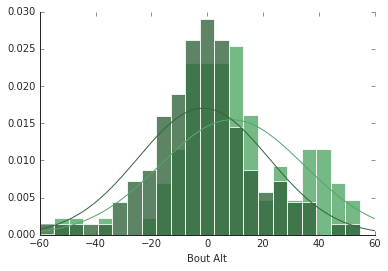

SELECT "Bout Alt" FROM bout_table WHERE "Para Alt" BETWEEN .349 - .087 AND .349 AND "Para Alt Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3
SELECT "Bout Alt" FROM bout_table WHERE "Para Alt" BETWEEN .349 - .087 AND .349 AND "Para Alt Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3
115 bouts in Query 1
Mean Q1 = 12.9747058533
184 bouts in Query 2
Mean Q2 = -0.549860062526
Ttest_indResult(statistic=4.8587027192580683, pvalue=1.9157283708168861e-06)


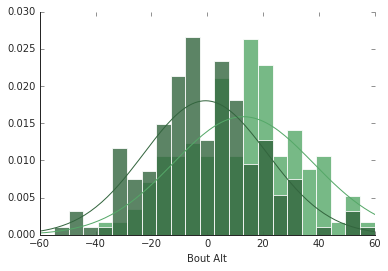

In [70]:
color = cp[2]
varb = '"Bout Alt"'
#lims = [-20, 20, 2]
lims = [-60, 60, 5]
# raw_q = bdsim.compare_2_queries(varb, 
#     '"Para Az" BETWEEN 0 AND .087 AND "Para Az Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" == 3', 
#     '"Para Az" BETWEEN 0 AND .087 AND "Para Az Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" == 3', 
#     1, 0, color, lims, 1)

# raw_q = bdsim_raw.compare_2_queries(varb, 
#     '"Para Alt" BETWEEN .349 AND .436 AND "Para Alt Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" == 3', 
#     '"Para Alt" BETWEEN .349 AND .436 AND "Para Alt Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" == 3', 
#     1, 0, color, lims, 1)

# raw_q = bdsim_raw.compare_2_queries(varb, 
#     '"Para Alt" BETWEEN .349 - .087 AND .349 AND "Para Alt Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
#     '"Para Alt" BETWEEN .349 - .087 AND .349 AND "Para Alt Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
#     1, 0, color, lims, 1)

raw_q[0].savefig('twovp.pdf')

SELECT "Bout Delta Yaw" FROM bout_table WHERE "Para Az" BETWEEN -.087 AND 0 AND "Para Az Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3
SELECT "Bout Delta Yaw" FROM bout_table WHERE "Para Az" BETWEEN -.087 AND 0 AND "Para Az Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3
     Bout Delta Yaw
0         -0.114029
1         -0.104455
2         -0.016076
3          0.008123
4          0.021448
5         -0.026885
6         -0.218376
7         -0.021033
8         -0.101466
9         -0.120098
10        -0.219855
11        -0.001722
12        -0.067860
13         0.007410
14         0.014841
15        -0.027086
16         0.027375
17        -0.038747
18         0.004850
19        -0.013376
20        -0.032897
21        -0.140207
22        -0.159866
23         0.013666
24        -0.107488
25        -0.514920
26        -0.105014
27         0.001671
28         0.101649
29        -0.062368
..              ...
157       -0.048356
158       -0.009970
159       -0.11068

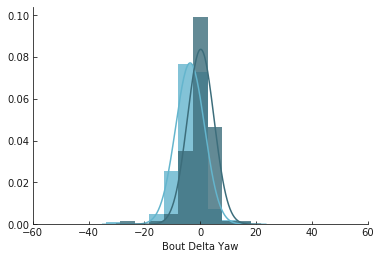

SELECT "Bout Delta Yaw" FROM bout_table WHERE "Para Az" BETWEEN -.175 AND -.087 AND "Para Az Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3
SELECT "Bout Delta Yaw" FROM bout_table WHERE "Para Az" BETWEEN -.175 AND -.087 AND "Para Az Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3
     Bout Delta Yaw
0         -0.289714
1          0.015923
2         -0.019226
3         -0.108112
4         -0.032330
5         -0.145914
6         -0.032847
7         -0.162809
8         -0.319777
9         -0.113634
10        -0.040142
11        -0.037030
12        -0.123656
13        -0.096817
14        -0.144558
15        -0.218575
16        -0.129551
17        -0.076959
18        -0.026207
19        -0.014206
20        -0.183918
21        -0.196562
22        -0.093253
23        -0.191675
24        -0.229485
25        -0.060591
26        -0.061109
27        -0.104969
28        -0.111098
29        -0.016613
..              ...
96        -0.070607
97        -0.132164
98        

<Figure size 432x288 with 0 Axes>

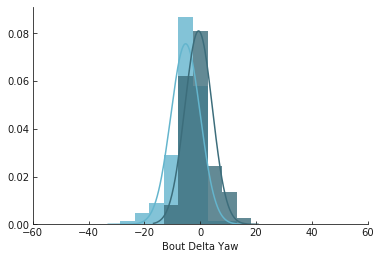

SELECT "Bout Delta Yaw" FROM bout_table WHERE "Para Az" BETWEEN -.261 AND -.175 AND "Para Az Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3
SELECT "Bout Delta Yaw" FROM bout_table WHERE "Para Az" BETWEEN -.261 AND -.175 AND "Para Az Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3
    Bout Delta Yaw
0        -0.009263
1        -0.126705
2         0.042737
3        -0.076179
4        -0.237263
5        -0.161246
6        -0.166624
7        -0.143363
8        -0.175827
9        -0.209079
10       -0.242820
11       -0.290294
12       -0.206940
13       -0.049626
14       -0.159075
15       -0.248929
16       -0.149395
17       -0.084417
18       -0.208045
19       -0.035571
20       -0.022792
21       -0.086794
22       -0.168384
23        0.020778
24       -0.105589
25       -0.145817
26        0.055108
27       -0.107434
28       -0.213850
29       -0.409261
..             ...
54       -0.113788
55       -0.259661
56       -0.223007
57       -0.081915
58    

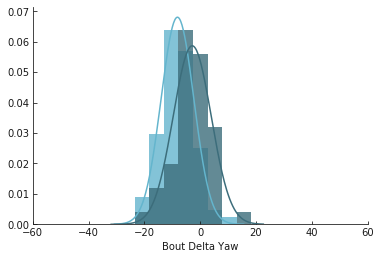

SELECT "Bout Delta Yaw" FROM bout_table WHERE "Para Az" BETWEEN -.349 AND -.261 AND "Para Az Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3
SELECT "Bout Delta Yaw" FROM bout_table WHERE "Para Az" BETWEEN -.349 AND -.261 AND "Para Az Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3
    Bout Delta Yaw
0        -0.268058
1        -0.201291
2        -0.247912
3        -0.263211
4        -0.275065
5        -0.353053
6        -0.305209
7        -0.138702
8        -0.248662
9        -0.260902
10       -0.117174
11       -0.256989
12       -0.298123
13       -0.207849
14       -0.306654
15       -0.043453
16       -0.104978
17       -0.206309
18       -0.038516
19       -0.408054
20       -0.326539
21       -0.216054
22       -0.330726
23       -0.387186
24       -0.233196
25       -0.070278
26       -0.300522
27       -0.379881
28       -0.272786
29       -0.532101
30       -0.230126
31       -0.253791
32       -0.001095
33       -0.174240
34       -0.394722
35    

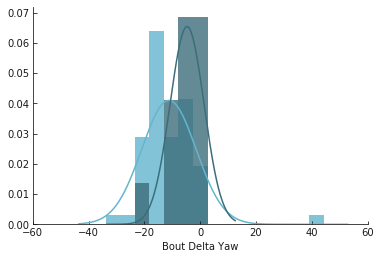

SELECT "Bout Delta Yaw" FROM bout_table WHERE "Para Az" BETWEEN -.436 AND -.349 AND "Para Az Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3
SELECT "Bout Delta Yaw" FROM bout_table WHERE "Para Az" BETWEEN -.436 AND -.349 AND "Para Az Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3
    Bout Delta Yaw
0        -0.039627
1        -0.050917
2        -0.188099
3         0.030234
4        -0.193812
5        -0.429482
6        -0.307403
7        -0.227097
8        -0.359092
9        -0.401688
10       -0.137150
11       -0.077294
12       -0.367700
13       -0.201179
14       -0.353550
15       -0.266956
16       -0.458681
17       -0.204802
18       -0.404513
19       -0.232429
20        0.014446
21       -0.220602
22       -0.355080
23        0.025422
24       -0.011665
25       -0.315777
26       -0.149577
27       -0.046323
28        0.017483
29 bouts in Query 1
Mean Q1 = -11.682232073
10 bouts in Query 2
Mean Q2 = -4.38665670174
Ttest_indResult(statistic=-2.04

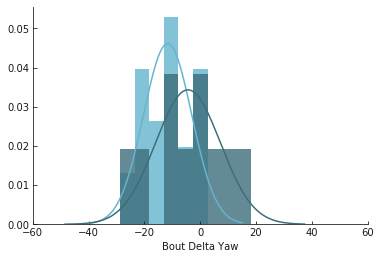

SELECT "Bout Delta Yaw" FROM bout_table WHERE "Para Az" BETWEEN -.524 AND -.436 AND "Para Az Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3
SELECT "Bout Delta Yaw" FROM bout_table WHERE "Para Az" BETWEEN -.524 AND -.436 AND "Para Az Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3
    Bout Delta Yaw
0        -0.441926
1        -0.348403
2        -0.286235
3         0.014140
4        -0.513475
5        -0.150465
6        -0.333497
7         0.063163
8        -0.557970
9        -0.124567
10       -0.035469
11       -0.471726
12       -0.563525
13       -0.068266
14       -0.362169
15       -0.472737
16       -0.148530
17       -0.175805
18       -0.525326
19       -0.358940
20       -0.375010
21       -0.115382
22       -0.048526
23       -0.230594
24       -0.256889
25 bouts in Query 1
Mean Q1 = -15.7864307451
12 bouts in Query 2
Mean Q2 = -8.05378420276
Ttest_indResult(statistic=-2.1704056186482403, pvalue=0.036846514012613754)


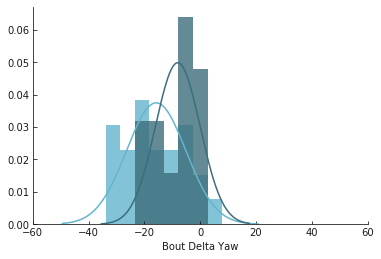

SELECT "Bout Delta Yaw" FROM bout_table WHERE "Para Az" < -.524 AND "Para Az Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3
SELECT "Bout Delta Yaw" FROM bout_table WHERE "Para Az" < -.524 AND "Para Az Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3
    Bout Delta Yaw
0        -0.499774
1        -0.759045
2         0.039591
3        -0.841605
4         0.021849
5        -0.588059
6        -0.539741
7        -0.247601
8        -0.632640
9        -0.431967
10        0.001996
11       -0.963517
12       -0.437889
13       -0.552196
14       -0.383330
15       -0.117169
16       -0.209920
17       -0.507108
18       -0.440899
19       -0.013791
20       -0.506514
21       -0.399673
22       -0.375674
23       -0.440712
24       -0.474462
25       -0.371197
26       -0.215391
27       -0.434464
28       -0.708205
29       -0.444346
30       -0.266327
31       -0.331399
32       -0.415704
33       -0.032254
34       -0.293237
35       -0.078084
36       -0.461767


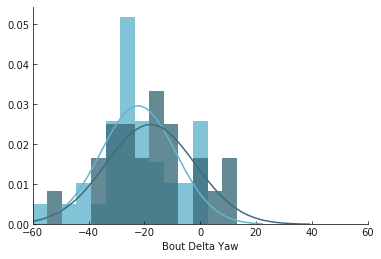

SELECT "Bout Delta Yaw" FROM bout_table WHERE "Para Az" BETWEEN 0 AND .087 AND "Para Az Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" <  3
SELECT "Bout Delta Yaw" FROM bout_table WHERE "Para Az" BETWEEN 0 AND .087 AND "Para Az Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" <  3
     Bout Delta Yaw
0         -0.012826
1          0.029112
2          0.131455
3          0.024192
4          0.143721
5          0.132520
6          0.082475
7          0.115164
8          0.090850
9          0.152995
10         0.035973
11         0.033291
12        -0.010230
13         0.009157
14         0.025661
15         0.156052
16        -0.005360
17         0.040121
18         0.124175
19         0.085936
20         0.046396
21         0.060100
22         0.133093
23         0.128015
24         0.232630
25         0.111692
26         0.106760
27         0.039996
28         0.182774
29        -0.036933
..              ...
144       -0.014997
145       -0.079929
146        0.05242

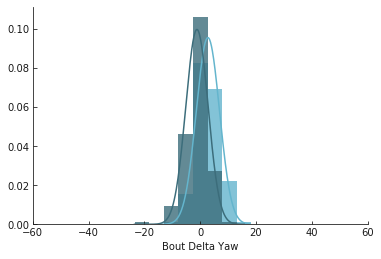

SELECT "Bout Delta Yaw" FROM bout_table WHERE "Para Az" BETWEEN .087 AND .175 AND "Para Az Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" <  3
SELECT "Bout Delta Yaw" FROM bout_table WHERE "Para Az" BETWEEN .087 AND .175 AND "Para Az Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" <  3
     Bout Delta Yaw
0          0.237575
1          0.180571
2          0.156060
3         -0.060687
4          0.199696
5          0.062348
6          0.227299
7          0.217408
8          0.228583
9          0.113886
10         0.305475
11         0.253201
12         0.275002
13         0.034024
14         0.078865
15        -0.034641
16        -0.017104
17         0.041735
18         0.077122
19         0.067497
20         0.200450
21         0.043564
22         0.121593
23         0.394611
24         0.238690
25        -0.051739
26         0.067905
27         0.198823
28         0.013914
29         0.078528
..              ...
109        0.127336
110       -0.138686
111        0

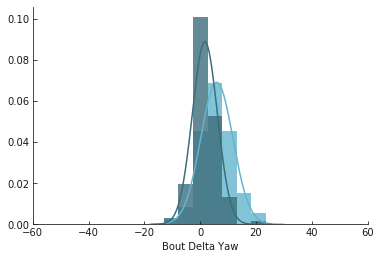

SELECT "Bout Delta Yaw" FROM bout_table WHERE "Para Az" BETWEEN .175 AND .261 AND "Para Az Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" <  3
SELECT "Bout Delta Yaw" FROM bout_table WHERE "Para Az" BETWEEN .175 AND .261 AND "Para Az Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" <  3
    Bout Delta Yaw
0         0.323137
1        -0.002544
2        -0.031079
3         0.023293
4         0.022897
5         0.112125
6         0.211799
7         0.192071
8         0.125468
9         0.120857
10        0.094446
11        0.063839
12        0.236073
13        0.161309
14        0.382354
15        0.011032
16        0.291444
17        0.077642
18       -0.038284
19        0.150241
20        0.175036
21       -0.030368
22        0.135891
23        0.229288
24        0.045292
25        0.223643
26        0.127912
27        0.096127
28        0.073898
29        0.117636
..             ...
60        0.094624
61        0.210476
62        0.035973
63        0.140548
64      

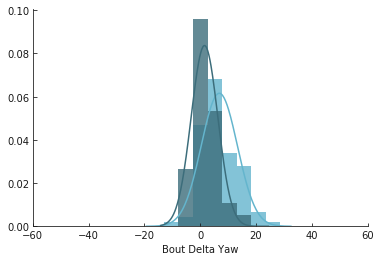

SELECT "Bout Delta Yaw" FROM bout_table WHERE "Para Az" BETWEEN .261 AND .349 AND "Para Az Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" <  3
SELECT "Bout Delta Yaw" FROM bout_table WHERE "Para Az" BETWEEN .261 AND .349 AND "Para Az Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" <  3
    Bout Delta Yaw
0         0.161231
1         0.237304
2         0.375077
3         0.258389
4         0.060601
5         0.231118
6         0.255409
7         0.368147
8         0.322893
9         0.290663
10       -0.006622
11        0.197698
12        0.182893
13        0.156505
14        0.161360
15        0.328628
16        0.225568
17        0.393097
18        0.162464
19        0.162975
20       -0.002350
21        0.257036
22        0.033664
23        0.077716
24        0.274548
25        0.324629
26        0.392005
27        0.033384
28        0.068198
29        0.175763
30        0.053906
31        0.044538
32        0.185341
33        0.215915
34        0.239260
35      

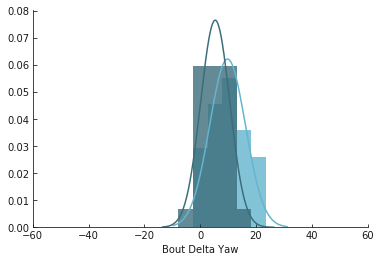

SELECT "Bout Delta Yaw" FROM bout_table WHERE "Para Az" BETWEEN .349 AND .436 AND "Para Az Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" <  3
SELECT "Bout Delta Yaw" FROM bout_table WHERE "Para Az" BETWEEN .349 AND .436 AND "Para Az Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" <  3
    Bout Delta Yaw
0         0.295636
1         0.337583
2         0.403358
3         0.030649
4         0.282580
5         0.316307
6         0.046887
7         0.283512
8         0.204605
9         0.156310
10        0.335879
11        0.326353
12       -0.006838
13        0.299730
14        0.372922
15        0.142804
16        0.203926
17        0.069361
18       -0.036459
19        0.119134
20        0.346110
21       -0.075129
22        0.086864
23       -0.039516
24        0.172762
25        0.005228
26        0.198456
27        0.142171
28 bouts in Query 1
Mean Q1 = 10.2747398608
14 bouts in Query 2
Mean Q2 = 6.53342986789
Ttest_indResult(statistic=1.3885942684167307, pvalue=

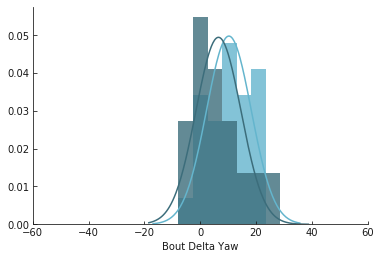

SELECT "Bout Delta Yaw" FROM bout_table WHERE "Para Az" BETWEEN .436 AND .524 AND "Para Az Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" <  3
SELECT "Bout Delta Yaw" FROM bout_table WHERE "Para Az" BETWEEN .436 AND .524 AND "Para Az Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" <  3
    Bout Delta Yaw
0         0.250705
1         0.221963
2         0.316654
3         0.381324
4         0.323733
5         0.282265
6         0.276051
7         0.117478
8         0.294166
9         0.308293
10        0.303759
11        0.298494
12        0.342179
13        0.288011
14        0.558639
15        0.121034
16        0.045154
17        0.314360
18        0.235441
19        0.189249
20 bouts in Query 1
Mean Q1 = 15.6674025854
18 bouts in Query 2
Mean Q2 = 6.61970096799
Ttest_indResult(statistic=4.2280317210115115, pvalue=0.0001541569831560468)


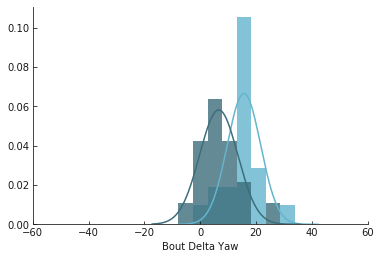

SELECT "Bout Delta Yaw" FROM bout_table WHERE "Para Az" > .524 AND "Para Az Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" <  3
SELECT "Bout Delta Yaw" FROM bout_table WHERE "Para Az" > .524 AND "Para Az Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" <  3
    Bout Delta Yaw
0         0.506194
1         0.043739
2         0.467361
3         0.712675
4         0.478080
5         0.541008
6         0.436407
7         0.557846
8         0.274782
9         0.291594
10       -0.006768
11        0.536881
12        0.503854
13        0.023353
14        0.281192
15        0.064131
16        0.042481
17        0.483163
18        0.317958
19        0.444023
20        0.002700
21        0.531266
22        0.062098
23        0.554462
24        0.834959
25        0.382833
26        0.103493
27        0.477327
28        0.149565
29        0.012079
30        0.279815
31        0.031393
32        0.558556
33        0.072035
34        0.650304
35        0.784974
36        0.476188


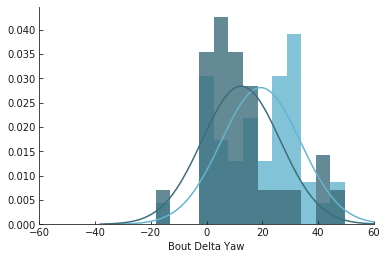

In [5]:
color = cp[9]
lims = [-60, 60, 5]
varb = '"Bout Delta Yaw"'
# raw_q = bdsim_raw_raw.compare_2_queries('"Bout Az"', 
#     '"Para Az" BETWEEN .3 AND .6 AND "Para Az Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" <3', 
#     '"Para Az" BETWEEN .3 AND .6 AND "Para Az Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" <3', 
#     1, 0, color)

naz0 = bdsim_raw.compare_2_queries(varb, 
        '"Para Az" BETWEEN -.087 AND 0 AND "Para Az Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
        '"Para Az" BETWEEN -.087 AND 0 AND "Para Az Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
        1, 0, color, lims, 1)

pl.savefig('Az_2q.pdf')

naz1 = bdsim_raw.compare_2_queries(varb, 
        '"Para Az" BETWEEN -.175 AND -.087 AND "Para Az Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
        '"Para Az" BETWEEN -.175 AND -.087 AND "Para Az Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
        1, 0, color, lims, 1)
naz2 = bdsim_raw.compare_2_queries(varb, 
        '"Para Az" BETWEEN -.261 AND -.175 AND "Para Az Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
        '"Para Az" BETWEEN -.261 AND -.175 AND "Para Az Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
        1, 0, color, lims, 1)
naz3 = bdsim_raw.compare_2_queries(varb, 
        '"Para Az" BETWEEN -.349 AND -.261 AND "Para Az Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
        '"Para Az" BETWEEN -.349 AND -.261 AND "Para Az Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
        1, 0, color, lims, 1)
naz4 = bdsim_raw.compare_2_queries(varb, 
        '"Para Az" BETWEEN -.436 AND -.349 AND "Para Az Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
        '"Para Az" BETWEEN -.436 AND -.349 AND "Para Az Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
        1, 0, color, lims, 1)
naz5 = bdsim_raw.compare_2_queries(varb, 
        '"Para Az" BETWEEN -.524 AND -.436 AND "Para Az Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
        '"Para Az" BETWEEN -.524 AND -.436 AND "Para Az Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
        1, 0, color, lims, 1)

naz6 = bdsim_raw.compare_2_queries(varb, 
        '"Para Az" < -.524 AND "Para Az Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
        '"Para Az" < -.524 AND "Para Az Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
        1, 0, color, lims, 1)

az0 = bdsim_raw.compare_2_queries(varb, 
        '"Para Az" BETWEEN 0 AND .087 AND "Para Az Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" <  3', 
        '"Para Az" BETWEEN 0 AND .087 AND "Para Az Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" <  3', 
        1, 0, color, lims,1)

az0[0].savefig('az_2q.pdf')

az1 = bdsim_raw.compare_2_queries(varb, 
        '"Para Az" BETWEEN .087 AND .175 AND "Para Az Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" <  3', 
        '"Para Az" BETWEEN .087 AND .175 AND "Para Az Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" <  3', 
        1, 0, color, lims,1)
az2 = bdsim_raw.compare_2_queries(varb, 
        '"Para Az" BETWEEN .175 AND .261 AND "Para Az Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" <  3', 
        '"Para Az" BETWEEN .175 AND .261 AND "Para Az Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" <  3', 
        1, 0, color, lims,1)
az3 = bdsim_raw.compare_2_queries(varb, 
        '"Para Az" BETWEEN .261 AND .349 AND "Para Az Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" <  3', 
        '"Para Az" BETWEEN .261 AND .349 AND "Para Az Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" <  3', 
        1, 0, color, lims,1)
az4 = bdsim_raw.compare_2_queries(varb, 
        '"Para Az" BETWEEN .349 AND .436 AND "Para Az Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" <  3', 
        '"Para Az" BETWEEN .349 AND .436 AND "Para Az Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" <  3', 
        1, 0, color, lims,1)
az5 = bdsim_raw.compare_2_queries(varb, 
        '"Para Az" BETWEEN .436 AND .524 AND "Para Az Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" <  3', 
        '"Para Az" BETWEEN .436 AND .524 AND "Para Az Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" <  3', 
        1, 0, color, lims,1)

az6 = bdsim_raw.compare_2_queries(varb, 
        '"Para Az" > .524 AND "Para Az Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" <  3', 
        '"Para Az" > .524 AND "Para Az Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" <  3', 
        1, 0, color, lims,1)

# NOTE THAT THE QUERIES BELOW ALL RETURN LESS THAN 20 BOUTS TOTAL. THEREFORE COMBINED ALL ABOVE .524 (30 degrees)

# az6 = bdsim_raw.compare_2_queries(varb, 
#         '"Para Az" BETWEEN .524 AND .611 AND "Para Az Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" <  3', 
#         '"Para Az" BETWEEN .524 AND .611 AND "Para Az Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" <  3', 
#         1, 0, color, lims,1)
# az7 = bdsim_raw.compare_2_queries(varb, 
#         '"Para Az" BETWEEN .611 AND .698 AND "Para Az Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" <  3', 
#         '"Para Az" BETWEEN .611 AND .698 AND "Para Az Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" <  3', 
#         1, 0, color, lims,1)
# az8 = bdsim_raw.compare_2_queries(varb, 
#         '"Para Az" BETWEEN .698 AND .785 AND "Para Az Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" <  3', 
#         '"Para Az" BETWEEN .698 AND .785 AND "Para Az Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" <  3', 
#         1, 0, color, lims,1)


# THERE ARENT ENOUGH BOUTS IN 7 OR 8 TO PLOT. 6 HAS 24 BOUTS. TO BE SYMMETRIC WITH POS, USE LESS THAN -.524. 

# az6 = bdsim_raw.compare_2_queries(varb, 
#         '"Para Az" BETWEEN -.611 AND -.524 AND "Para Az Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" <3', 
#         '"Para Az" BETWEEN -.611 AND -.524 AND "Para Az Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" <3', 
#         1, 0, color, lims, 1)
# az7 = bdsim_raw.compare_2_queries(varb, 
#         '"Para Az" BETWEEN -.698 AND -.611 AND "Para Az Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" <3', 
#         '"Para Az" BETWEEN -.698 AND -.611 AND "Para Az Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" <3', 
#         1, 0, color, lims, 1)
# az8 = bdsim_raw.compare_2_queries(varb, 
#         '"Para Az" BETWEEN -.785 AND -.698 AND "Para Az Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" <3', 
#         '"Para Az" BETWEEN -.785 AND -.698 AND "Para Az Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" <3', 
#         1, 0, color, lims, 1)




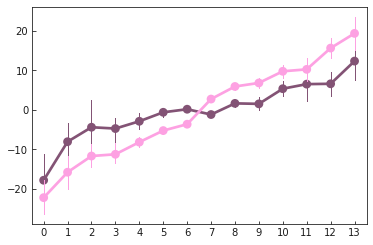

In [57]:
# NEG OR POS

# fig = sb.barplot(data=[az0[1], az0[2], az1[1], az1[2], az2[1], az2[2], az3[1], az3[2],
#                  az4[1], az4[2], az5[1], az5[2], az6[1], az6[2]], ci=95, color='b')

# BOTH

# fig = sb.barplot(data=[naz6[2], naz6[1], naz5[2], naz5[1], naz4[2], naz4[1], naz3[2], naz3[1], 
#                        naz2[2], naz2[1], naz1[2], naz1[1], naz0[2], naz0[1], 
#                        az0[1], az0[2], az1[1], az1[2], az2[1], az2[2], az3[1], az3[2],
#                        az4[1], az4[2], az5[1], az5[2], az6[1], az6[2]], ci=95, color='b')


color = np.array(cp[6])
fig, ax = pl.subplots(1,1)
sb.pointplot(data=[naz6[2], naz5[2], naz4[2], naz3[2], naz2[2], naz1[2], naz0[2],  
                       az0[2], az1[2], az2[2], az3[2],
                       az4[2], az5[2], az6[2]], color=color * .6, ci=95, errwidth=1)

sb.pointplot(data=[naz6[1], naz5[1], naz4[1], naz3[1], naz2[1], naz1[1], naz0[1],  
                       az0[1], az1[1], az2[1], az3[1],
                       az4[1], az5[1], az6[1]], color=color * 1.16, ci=95, errwidth=1)



pl.savefig('bout_dyaw_velocity_line.pdf')
pl.show()

### USE FOR ALT QUERIES

SELECT "Bout Delta Pitch" FROM bout_table WHERE "Para Alt" BETWEEN -.087 AND 0 AND "Para Alt Velocity" < 0 AND "Bout Number" > 0  AND "Strike Or Abort" <  3
SELECT "Bout Delta Pitch" FROM bout_table WHERE "Para Alt" BETWEEN -.087 AND 0 AND "Para Alt Velocity" > 0 AND "Bout Number" > 0  AND "Strike Or Abort" <  3
30 bouts in Query 1
Mean Q1 = -2.24289417915
22 bouts in Query 2
Mean Q2 = -4.55576723105
Ttest_indResult(statistic=1.1894246891231002, pvalue=0.23989035525822777)


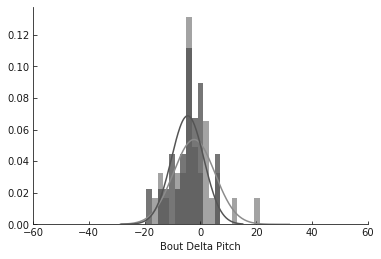

SELECT "Bout Delta Pitch" FROM bout_table WHERE "Para Alt" < -.087 AND "Para Alt Velocity" < 0 AND "Bout Number" > 0  AND "Strike Or Abort" <  3
SELECT "Bout Delta Pitch" FROM bout_table WHERE "Para Alt" < -.087 AND "Para Alt Velocity" > 0 AND "Bout Number" > 0  AND "Strike Or Abort" <  3
53 bouts in Query 1
Mean Q1 = -3.06809022041
32 bouts in Query 2
Mean Q2 = -5.73222016229
Ttest_indResult(statistic=1.186150726771674, pvalue=0.23894718589793479)


<Figure size 432x288 with 0 Axes>

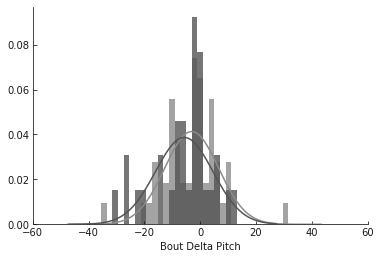

SELECT "Bout Delta Pitch" FROM bout_table WHERE "Para Alt" BETWEEN 0 AND .087 AND "Para Alt Velocity" > 0 AND "Bout Number" > 0  AND "Strike Or Abort" <  3
SELECT "Bout Delta Pitch" FROM bout_table WHERE "Para Alt" BETWEEN 0 AND .087 AND "Para Alt Velocity" < 0 AND "Bout Number" > 0  AND "Strike Or Abort" <  3
24 bouts in Query 1
Mean Q1 = -1.12904995925
46 bouts in Query 2
Mean Q2 = -2.42038759185
Ttest_indResult(statistic=0.93006552177298585, pvalue=0.35562725478882129)


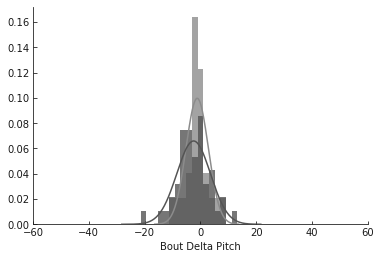

SELECT "Bout Delta Pitch" FROM bout_table WHERE "Para Alt" BETWEEN .087 AND .175 AND "Para Alt Velocity" > 0 AND "Bout Number" > 0  AND "Strike Or Abort" <  3
SELECT "Bout Delta Pitch" FROM bout_table WHERE "Para Alt" BETWEEN .087 AND .175 AND "Para Alt Velocity" < 0 AND "Bout Number" > 0  AND "Strike Or Abort" <  3
61 bouts in Query 1
Mean Q1 = 0.915833903438
100 bouts in Query 2
Mean Q2 = -1.06786026755
Ttest_indResult(statistic=2.3975233708423063, pvalue=0.017665926438483765)


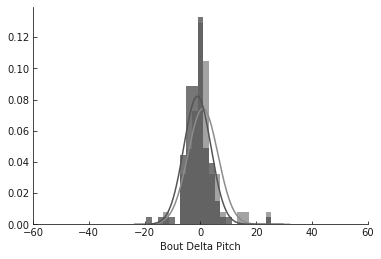

SELECT "Bout Delta Pitch" FROM bout_table WHERE "Para Alt" BETWEEN .175 AND .261 AND "Para Alt Velocity" > 0 AND "Bout Number" > 0  AND "Strike Or Abort" <  3
SELECT "Bout Delta Pitch" FROM bout_table WHERE "Para Alt" BETWEEN .175 AND .261 AND "Para Alt Velocity" < 0 AND "Bout Number" > 0  AND "Strike Or Abort" <  3
73 bouts in Query 1
Mean Q1 = 1.86317826175
135 bouts in Query 2
Mean Q2 = 0.726049222643
Ttest_indResult(statistic=1.1762044189438987, pvalue=0.24087064324205745)


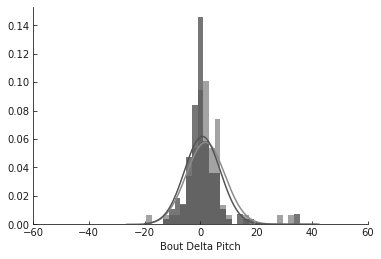

SELECT "Bout Delta Pitch" FROM bout_table WHERE "Para Alt" BETWEEN .261 AND .349 AND "Para Alt Velocity" > 0 AND "Bout Number" > 0  AND "Strike Or Abort" <  3
SELECT "Bout Delta Pitch" FROM bout_table WHERE "Para Alt" BETWEEN .261 AND .349 AND "Para Alt Velocity" < 0 AND "Bout Number" > 0  AND "Strike Or Abort" <  3
116 bouts in Query 1
Mean Q1 = 3.16058528177
187 bouts in Query 2
Mean Q2 = 1.47841007435
Ttest_indResult(statistic=2.8849660711017284, pvalue=0.0041972650266070321)


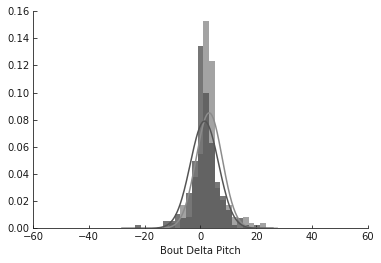

SELECT "Bout Delta Pitch" FROM bout_table WHERE "Para Alt" BETWEEN .349 AND .436 AND "Para Alt Velocity" > 0 AND "Bout Number" > 0  AND "Strike Or Abort" <  3
SELECT "Bout Delta Pitch" FROM bout_table WHERE "Para Alt" BETWEEN .349 AND .436 AND "Para Alt Velocity" < 0 AND "Bout Number" > 0  AND "Strike Or Abort" <  3
124 bouts in Query 1
Mean Q1 = 3.92502106615
185 bouts in Query 2
Mean Q2 = 2.10727820854
Ttest_indResult(statistic=3.62461776954326, pvalue=0.00033862631025692569)


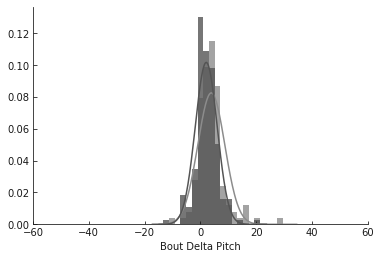

HEY BOLTON
0.43737478062
0.250202540988
SELECT "Bout Delta Pitch" FROM bout_table WHERE "Para Alt" BETWEEN .436 AND .524 AND "Para Alt Velocity" > 0 AND "Bout Number" > 0  AND "Strike Or Abort" <  3
SELECT "Bout Delta Pitch" FROM bout_table WHERE "Para Alt" BETWEEN .436 AND .524 AND "Para Alt Velocity" < 0 AND "Bout Number" > 0  AND "Strike Or Abort" <  3
126 bouts in Query 1
Mean Q1 = 4.86276251623
150 bouts in Query 2
Mean Q2 = 3.62216550876
Ttest_indResult(statistic=2.0717856807137438, pvalue=0.039221033542771414)


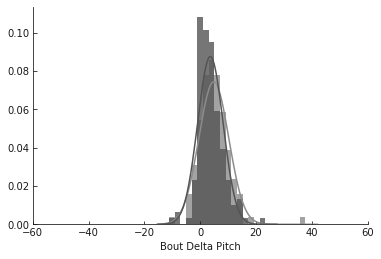

SELECT "Bout Delta Pitch" FROM bout_table WHERE "Para Alt" BETWEEN .524 AND .611 AND "Para Alt Velocity" > 0 AND "Bout Number" > 0  AND "Strike Or Abort" <  3
SELECT "Bout Delta Pitch" FROM bout_table WHERE "Para Alt" BETWEEN .524 AND .611 AND "Para Alt Velocity" < 0 AND "Bout Number" > 0  AND "Strike Or Abort" <  3
73 bouts in Query 1
Mean Q1 = 7.51790018758
67 bouts in Query 2
Mean Q2 = 5.17320374056
Ttest_indResult(statistic=2.8119706869565064, pvalue=0.005641896247640818)


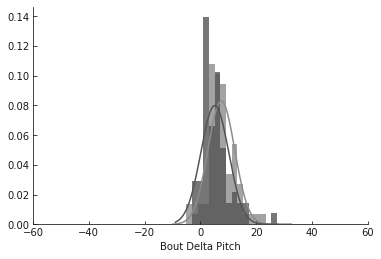

SELECT "Bout Delta Pitch" FROM bout_table WHERE "Para Alt" BETWEEN .611 AND .698 AND "Para Alt Velocity" > 0 AND "Bout Number" > 0  AND "Strike Or Abort" <  3
SELECT "Bout Delta Pitch" FROM bout_table WHERE "Para Alt" BETWEEN .611 AND .698 AND "Para Alt Velocity" < 0 AND "Bout Number" > 0  AND "Strike Or Abort" <  3
59 bouts in Query 1
Mean Q1 = 8.33586652868
40 bouts in Query 2
Mean Q2 = 5.53108943712
Ttest_indResult(statistic=1.980719984043553, pvalue=0.050454779467337341)


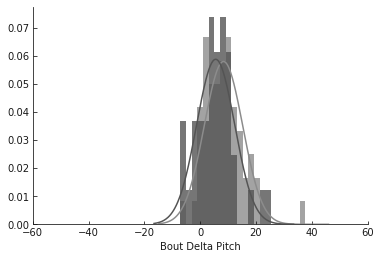

SELECT "Bout Delta Pitch" FROM bout_table WHERE "Para Alt" BETWEEN .698 AND .785 AND "Para Alt Velocity" > 0 AND "Bout Number" > 0  AND "Strike Or Abort" <  3
SELECT "Bout Delta Pitch" FROM bout_table WHERE "Para Alt" BETWEEN .698 AND .785 AND "Para Alt Velocity" < 0 AND "Bout Number" > 0  AND "Strike Or Abort" <  3
22 bouts in Query 1
Mean Q1 = 11.2844064185
13 bouts in Query 2
Mean Q2 = 9.076544672
Ttest_indResult(statistic=0.90437571565779407, pvalue=0.37235147213281272)


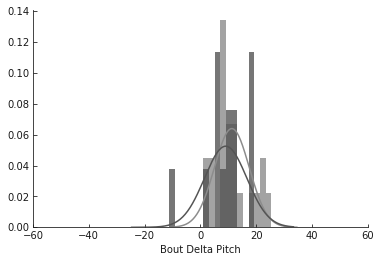

SELECT "Bout Delta Pitch" FROM bout_table WHERE "Para Alt" > .785 AND "Para Alt Velocity" > 0 AND "Bout Number" > 0  AND "Strike Or Abort" <  3
SELECT "Bout Delta Pitch" FROM bout_table WHERE "Para Alt" > .785 AND "Para Alt Velocity" < 0 AND "Bout Number" > 0  AND "Strike Or Abort" <  3
18 bouts in Query 1
Mean Q1 = 14.4585973767
25 bouts in Query 2
Mean Q2 = 5.45124595667
Ttest_indResult(statistic=3.1858397119377573, pvalue=0.0027586514436913948)


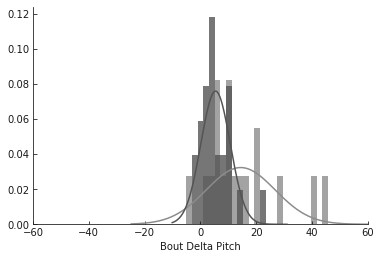

In [63]:
color = cp[7]
varb = '"Bout Delta Pitch"'
lims = [-60, 60, 2]
# raw_q = bdsim_raw_raw.compare_2_queries('"Bout Alt"', 
#     '"Para Alt" BETWEEN .3 AND .6 AND "Para Alt Velocity" > 0 AND "Bout Number" > 0  AND "Strike Or Abort" <  3', 
#     '"Para Alt" BETWEEN .3 AND .6 AND "Para Alt Velocity" < 0 AND "Bout Number" > 0  AND "Strike Or Abort" <  3', 
#     1, 0, color)

nalt0 = bdsim_raw.compare_2_queries(varb, 
        '"Para Alt" BETWEEN -.087 AND 0 AND "Para Alt Velocity" < 0 AND "Bout Number" > 0  AND "Strike Or Abort" <  3', 
        '"Para Alt" BETWEEN -.087 AND 0 AND "Para Alt Velocity" > 0 AND "Bout Number" > 0  AND "Strike Or Abort" <  3', 
        1, 0, color, lims, 1)

pl.savefig('Alt_2q.pdf')


nalt1 = bdsim_raw.compare_2_queries(varb, 
        '"Para Alt" < -.087 AND "Para Alt Velocity" < 0 AND "Bout Number" > 0  AND "Strike Or Abort" <  3', 
        '"Para Alt" < -.087 AND "Para Alt Velocity" > 0 AND "Bout Number" > 0  AND "Strike Or Abort" <  3', 
        1, 0, color, lims, 1)

alt0 = bdsim_raw.compare_2_queries(varb, 
        '"Para Alt" BETWEEN 0 AND .087 AND "Para Alt Velocity" > 0 AND "Bout Number" > 0  AND "Strike Or Abort" <  3', 
        '"Para Alt" BETWEEN 0 AND .087 AND "Para Alt Velocity" < 0 AND "Bout Number" > 0  AND "Strike Or Abort" <  3', 
        1, 0, color, lims, 1)

alt1 = bdsim_raw.compare_2_queries(varb, 
        '"Para Alt" BETWEEN .087 AND .175 AND "Para Alt Velocity" > 0 AND "Bout Number" > 0  AND "Strike Or Abort" <  3', 
        '"Para Alt" BETWEEN .087 AND .175 AND "Para Alt Velocity" < 0 AND "Bout Number" > 0  AND "Strike Or Abort" <  3', 
        1, 0, color, lims, 1)
alt2 = bdsim_raw.compare_2_queries(varb, 
        '"Para Alt" BETWEEN .175 AND .261 AND "Para Alt Velocity" > 0 AND "Bout Number" > 0  AND "Strike Or Abort" <  3', 
        '"Para Alt" BETWEEN .175 AND .261 AND "Para Alt Velocity" < 0 AND "Bout Number" > 0  AND "Strike Or Abort" <  3', 
        1, 0, color, lims, 1)
alt3 = bdsim_raw.compare_2_queries(varb, 
        '"Para Alt" BETWEEN .261 AND .349 AND "Para Alt Velocity" > 0 AND "Bout Number" > 0  AND "Strike Or Abort" <  3', 
        '"Para Alt" BETWEEN .261 AND .349 AND "Para Alt Velocity" < 0 AND "Bout Number" > 0  AND "Strike Or Abort" <  3', 
        1, 0, color, lims, 1)
alt4 = bdsim_raw.compare_2_queries(varb, 
        '"Para Alt" BETWEEN .349 AND .436 AND "Para Alt Velocity" > 0 AND "Bout Number" > 0  AND "Strike Or Abort" <  3', 
        '"Para Alt" BETWEEN .349 AND .436 AND "Para Alt Velocity" < 0 AND "Bout Number" > 0  AND "Strike Or Abort" <  3', 
        1, 0, color, lims, 1)

print("HEY BOLTON")
print stats.sem(alt3[1])
print norm(np.mean(alt3[1]), np.std(alt3[1])).cdf(0)

alt3[0].savefig('Alt_2q_15to20.pdf')
alt4[0].savefig('Alt_2q_20to25.pdf')

alt5 = bdsim_raw.compare_2_queries(varb, 
        '"Para Alt" BETWEEN .436 AND .524 AND "Para Alt Velocity" > 0 AND "Bout Number" > 0  AND "Strike Or Abort" <  3', 
        '"Para Alt" BETWEEN .436 AND .524 AND "Para Alt Velocity" < 0 AND "Bout Number" > 0  AND "Strike Or Abort" <  3', 
         1, 0, color, lims, 1)
alt6 = bdsim_raw.compare_2_queries(varb, 
        '"Para Alt" BETWEEN .524 AND .611 AND "Para Alt Velocity" > 0 AND "Bout Number" > 0  AND "Strike Or Abort" <  3', 
        '"Para Alt" BETWEEN .524 AND .611 AND "Para Alt Velocity" < 0 AND "Bout Number" > 0  AND "Strike Or Abort" <  3', 
        1, 0, color, lims, 1)
alt7 = bdsim_raw.compare_2_queries(varb, 
        '"Para Alt" BETWEEN .611 AND .698 AND "Para Alt Velocity" > 0 AND "Bout Number" > 0  AND "Strike Or Abort" <  3', 
        '"Para Alt" BETWEEN .611 AND .698 AND "Para Alt Velocity" < 0 AND "Bout Number" > 0  AND "Strike Or Abort" <  3', 
        1, 0, color, lims, 1)
alt8 = bdsim_raw.compare_2_queries(varb, 
        '"Para Alt" BETWEEN .698 AND .785 AND "Para Alt Velocity" > 0 AND "Bout Number" > 0  AND "Strike Or Abort" <  3', 
        '"Para Alt" BETWEEN .698 AND .785 AND "Para Alt Velocity" < 0 AND "Bout Number" > 0  AND "Strike Or Abort" <  3', 
        1, 0, color, lims, 1)

alt9 = bdsim_raw.compare_2_queries(varb, 
        '"Para Alt" > .785 AND "Para Alt Velocity" > 0 AND "Bout Number" > 0  AND "Strike Or Abort" <  3', 
        '"Para Alt" > .785 AND "Para Alt Velocity" < 0 AND "Bout Number" > 0  AND "Strike Or Abort" <  3', 
        1, 0, color, lims, 1)

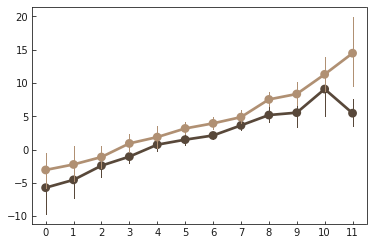

In [64]:
# POSITIVE

# sb.barplot(data=[alt0[1], alt0[2], alt1[1], alt1[2], alt2[1], alt2[2], alt3[1], alt3[2],
#                  alt4[1], alt4[2], alt5[1], alt5[2], alt6[1], alt6[2], alt7[1], alt7[2],
#                  alt8[1], alt8[2], alt9[1], alt9[2]], ci=95, color='r')


# NEGATIVE 

# sb.barplot(data=[alt0[1], alt0[2], alt1[1], alt1[2]], color='r', ci=95)


# BOTH

# sb.barplot(data=[nalt1[2], nalt1[1], nalt0[2], nalt0[1], alt0[1], alt0[2], alt1[1], alt1[2], alt2[1], alt2[2], alt3[1], alt3[2],
#                  alt4[1], alt4[2], alt5[1], alt5[2], alt6[1], alt6[2], alt7[1], alt7[2],
#                  alt8[1], alt8[2], alt9[1], alt9[2]], ci=95, color='r')

# pl.savefig('bars.pdf')

# pl.show()


color = np.array(cp[5])
fig, ax = pl.subplots(1,1)
sb.pointplot(data=[nalt1[2], nalt0[2], alt0[2], alt1[2], alt2[2], alt3[2],
                 alt4[2], alt5[2], alt6[2], alt7[2],
                 alt8[2], alt9[2]], ci=95, color=color * .6, errwidth=1)

sb.pointplot(data=[nalt1[1], nalt0[1], alt0[1], alt1[1], alt2[1], alt3[1],
                 alt4[1], alt5[1], alt6[1], alt7[1],
                 alt8[1], alt9[1]], ci=95, color=color *1.2, errwidth=1)
pl.savefig('bout_dpitch_velocity_line.pdf')

SELECT "Bout Dist" FROM bout_table WHERE "Para Dist" BETWEEN 0 AND 96 AND "Para Dist Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3
SELECT "Bout Dist" FROM bout_table WHERE "Para Dist" BETWEEN 0 AND 96 AND "Para Dist Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3
76 bouts in Query 1
Mean Q1 = 23.3420423261
304 bouts in Query 2
Mean Q2 = 34.6405234858
Ttest_indResult(statistic=-4.7666724167764603, pvalue=2.6766004319430703e-06)


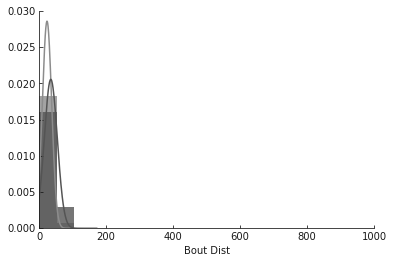

SELECT "Bout Dist" FROM bout_table WHERE "Para Dist" BETWEEN 96 AND 192 AND "Para Dist Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3
SELECT "Bout Dist" FROM bout_table WHERE "Para Dist" BETWEEN 96 AND 192 AND "Para Dist Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3
276 bouts in Query 1
Mean Q1 = 39.5117916032
567 bouts in Query 2
Mean Q2 = 44.9186703555
Ttest_indResult(statistic=-3.1743387935862479, pvalue=0.001556424892998844)


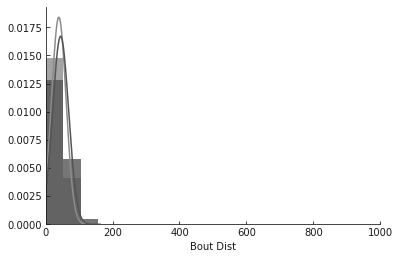

SELECT "Bout Dist" FROM bout_table WHERE "Para Dist" BETWEEN 192 AND 288 AND "Para Dist Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3
SELECT "Bout Dist" FROM bout_table WHERE "Para Dist" BETWEEN 192 AND 288 AND "Para Dist Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3
145 bouts in Query 1
Mean Q1 = 57.8108249446
194 bouts in Query 2
Mean Q2 = 60.4989263504
Ttest_indResult(statistic=-0.87769832555863647, pvalue=0.38073274526181566)


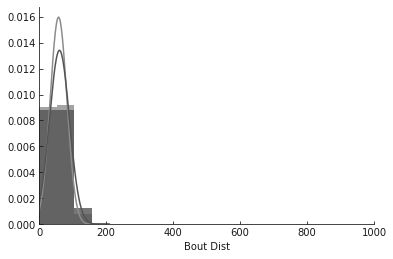

SELECT "Bout Dist" FROM bout_table WHERE "Para Dist" BETWEEN 288 AND 384 AND "Para Dist Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3
SELECT "Bout Dist" FROM bout_table WHERE "Para Dist" BETWEEN 288 AND 384 AND "Para Dist Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3
54 bouts in Query 1
Mean Q1 = 68.0420035008
74 bouts in Query 2
Mean Q2 = 70.0470385486
Ttest_indResult(statistic=-0.34339204757800956, pvalue=0.73187584563389363)


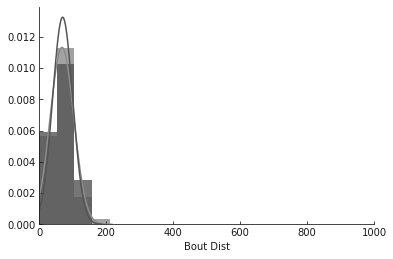

SELECT "Bout Dist" FROM bout_table WHERE "Para Dist" BETWEEN 384 AND 576 AND "Para Dist Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3
SELECT "Bout Dist" FROM bout_table WHERE "Para Dist" BETWEEN 384 AND 576 AND "Para Dist Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3
27 bouts in Query 1
Mean Q1 = 80.0674155837
52 bouts in Query 2
Mean Q2 = 57.3767871076
Ttest_indResult(statistic=3.658811780145617, pvalue=0.00046182508451953505)


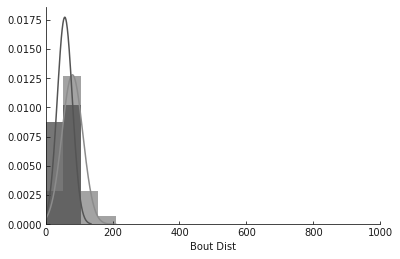

SELECT "Bout Dist" FROM bout_table WHERE "Para Dist" > 576 AND "Para Dist Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3
SELECT "Bout Dist" FROM bout_table WHERE "Para Dist" > 576 AND "Para Dist Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3
8 bouts in Query 1
Mean Q1 = 51.2401269013
4 bouts in Query 2
Mean Q2 = 52.7041127875
Ttest_indResult(statistic=-0.10633098490513768, pvalue=0.91742258986806613)


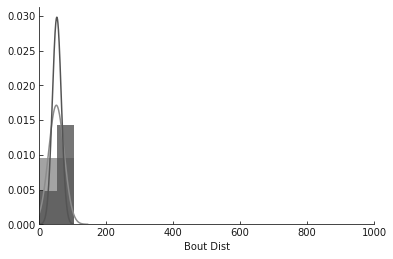

SELECT "Para Dist" FROM bout_table WHERE "Para Dist" BETWEEN 384 AND 576 AND "Para Dist Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3
SELECT "Para Dist" FROM bout_table WHERE "Para Dist" BETWEEN 384 AND 576 AND "Para Dist Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3
27 bouts in Query 1
Mean Q1 = 446.363555285
52 bouts in Query 2
Mean Q2 = 449.567792325
Ttest_indResult(statistic=-0.23668051352769334, pvalue=0.81353316414777788)


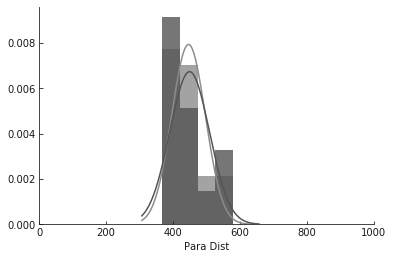

SELECT "Bout Dist" FROM bout_table WHERE "Para Dist" BETWEEN 0 AND 576 AND "Bout Number" > 0 AND "Strike Or Abort" < 3
SELECT "Bout Dist" FROM bout_table WHERE "Para Dist" > 576 AND "Bout Number" > 0 AND "Strike Or Abort" < 3
1772 bouts in Query 1
Mean Q1 = 46.7735142178
12 bouts in Query 2
Mean Q2 = 51.7281221967
Ttest_indResult(statistic=-0.63411291570637762, pvalue=0.52608852228205616)


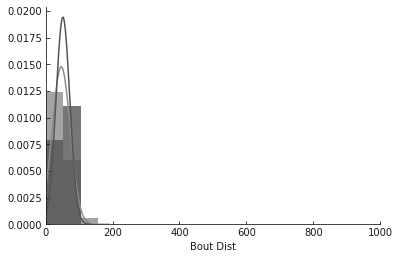

In [25]:
color = cp[7]
lims = [0, 1000, 50]
varb = '"Bout Dist"'


distv0 = bdsim_raw.compare_2_queries(varb, 
        '"Para Dist" BETWEEN 0 AND 96 AND "Para Dist Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
        '"Para Dist" BETWEEN 0 AND 96 AND "Para Dist Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
        1, 0, color, lims)

distv1 = bdsim_raw.compare_2_queries(varb, 
        '"Para Dist" BETWEEN 96 AND 192 AND "Para Dist Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
        '"Para Dist" BETWEEN 96 AND 192 AND "Para Dist Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
        1, 0, color, lims)

distv2 = bdsim_raw.compare_2_queries(varb, 
        '"Para Dist" BETWEEN 192 AND 288 AND "Para Dist Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
        '"Para Dist" BETWEEN 192 AND 288 AND "Para Dist Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
        1, 0, color, lims)

distv3 = bdsim_raw.compare_2_queries(varb, 
        '"Para Dist" BETWEEN 288 AND 384 AND "Para Dist Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
        '"Para Dist" BETWEEN 288 AND 384 AND "Para Dist Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
        1, 0, color, lims)

distv4 = bdsim_raw.compare_2_queries(varb, 
        '"Para Dist" BETWEEN 384 AND 576 AND "Para Dist Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
        '"Para Dist" BETWEEN 384 AND 576 AND "Para Dist Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
        1, 0, color, lims)

distv5 = bdsim_raw.compare_2_queries(varb, 
        '"Para Dist" > 576 AND "Para Dist Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
        '"Para Dist" > 576 AND "Para Dist Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
        1, 0, color, lims)



# ONLY 6 TOTAL BOUTS HERE! ONCE YOU GET PAST HERE THERE ARE ONLY ABOUT 15 BOUTS, BUT THESE SKEW THE REGRESSION FITS. 

# distv6 = bdsim_raw.compare_2_queries(varb, 
#         '"Para Dist" BETWEEN 572 AND 668 AND "Para Dist Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
#         '"Para Dist" BETWEEN 572 AND 668 AND "Para Dist Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
#         1, 0, color, lims)



# distv7 = bdsim_raw.compare_2_queries(varb, 
#         '"Para Dist" > 668 AND "Para Dist Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
#         '"Para Dist" > 668 AND "Para Dist Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
#         1, 0, color, lims)

# distv8 = bdsim_raw.compare_2_queries(varb, 
#         '"Para Dist" BETWEEN 762 AND 858 AND "Para Dist Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
#         '"Para Dist" BETWEEN 762 AND 858 AND "Para Dist Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
#         1, 0, color, lims)

test_sim = bdsim_raw.compare_2_queries('"Para Dist"', 
        '"Para Dist" BETWEEN 384 AND 576 AND "Para Dist Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
        '"Para Dist" BETWEEN 384 AND 576 AND "Para Dist Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
        1, 0, color, lims)

count_sim =  bdsim_raw.compare_2_queries(varb, 
            '"Para Dist" BETWEEN 0 AND 576 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
            '"Para Dist" > 576 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
            1, 0, color, lims)

# distv4 = bdsim_raw.compare_2_queries(varb, 
#         '"Para Dist" > 382 AND "Para Dist Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
#         '"Para Dist" > 382 AND "Para Dist Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
#         1, 0, color, lims)


# distv6 = bdsim_raw.compare_2_queries(varb, 
#         '"Para Dist" < -.524 AND "Para Dist Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
#         '"Para Dist" < -.524 AND "Para Dist Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
#         1, 0, color, lims)

distv0[0].savefig('dist_2q.pdf')





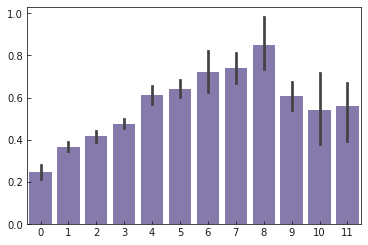

In [23]:
fig = sb.barplot(data=[distv0[1] * .0106, distv0[2] * .0106, 
                       distv1[1] * .0106, distv1[2] * .0106, 
                       distv2[1] * .0106, distv2[2] * .0106, 
                       distv3[1] * .0106, distv3[2] * .0106,
                       distv4[1] * .0106, distv4[2] * .0106, 
                       distv5[1] * .0106, distv5[2] * .0106] 
                #       distv6[1] * .0106, distv6[2] * .0106, 
                #       distv7[1] * .0106, distv7[2] * .0106, 
                #       distv8[1] * .0106, distv8[2] * .0106]
                        , ci=95, color=cp[4])





#fig = sb.barplot(data=[distv0[1], distv0[2], distv1[1], distv1[2], distv2[1], distv2[2], distv3[1], distv3[2]], ci=95, color=cp[3])

pl.savefig('bars.pdf')
pl.show()

### USE FOR DESCRIBING PARA POSITION CONTROLS

SELECT "Para Az" FROM bout_table WHERE "Para Az" BETWEEN 0 AND .087 AND "Para Alt Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3
SELECT "Para Az" FROM bout_table WHERE "Para Az" BETWEEN 0 AND .087 AND "Para Alt Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3
147 bouts in Query 1
Mean Q1 = 0.0451954299592
168 bouts in Query 2
Mean Q2 = 0.0430236095952
Ttest_indResult(statistic=0.7737252825455373, pvalue=0.43967724308726863)


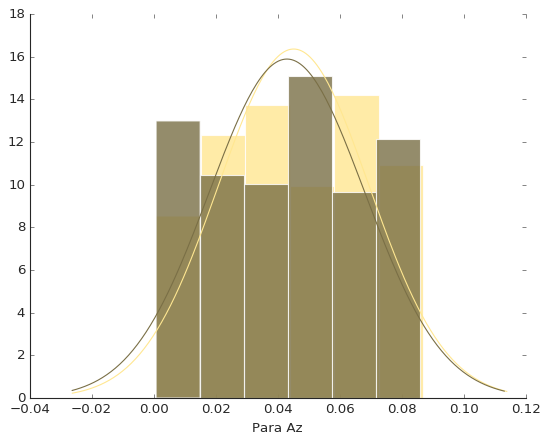

In [97]:
color = cp[8]
two_p = bdsim_raw.compare_2_queries('"Para Az"', 
    '"Para Az" BETWEEN 0 AND .087 AND "Para Alt Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
    '"Para Az" BETWEEN 0 AND .087 AND "Para Alt Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3',
    1, 0, color)

### OVERLAPPING TWO VARIABLE REGRESSIONS

SELECT "Para Az","Bout Delta Yaw" FROM bout_table WHERE "Bout Number" > 0 AND "Strike Or Abort" < 3
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 1784
Model:                            GLM   Df Residuals:                     1782
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                   50.8729345839
Method:                          IRLS   Log-Likelihood:                -6035.3
Date:                Wed, 17 Jul 2019   Deviance:                       90656.
Time:                        20:47:18   Pearson chi2:                 9.07e+04
No. Iterations:                     4                                         
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -0.4847      0.16

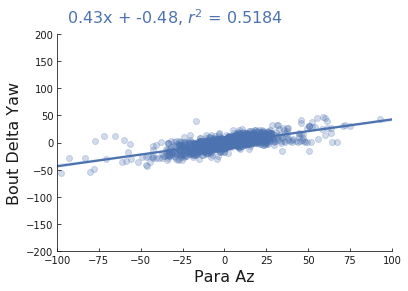

In [61]:
labels = ("Para Az", "Bout Delta Yaw")
query_exp = '"' + labels[0] + '","' + labels[1] + '"' 
lims = [[-100, 100], [-200, 200]]
colors = [cp[0], cp[0]]
rp = bdsim_raw.two_variable_regression(
        query_exp,
        '"Bout Number" > 0 AND "Strike Or Abort" < 3', 
        colors[1], labels, lims, 1)



### REGRESSION FOR ABSTRACTED MARR MODELS

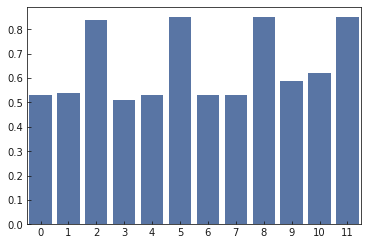

In [13]:
az_all_0to3_3to6_6plus = [.53, .51, .53, .59]
alt_all_0to3_3to6_6plus = [.54, .53, .53, .62]
dist_all_0to3_3to6_6plus = [.84, .85, .85, .85]

all_transforms = []

for at in zip(az_all_0to3_3to6_6plus, 
              alt_all_0to3_3to6_6plus, 
              dist_all_0to3_3to6_6plus):
    all_transforms += at
    
sb.barplot(data=[[a] for a in all_transforms], color=cp[0])
pl.savefig('slopes_across_boutwins.pdf')


#note overlapping 95% CIs for all with average.  

## FINAL MARR TRANSFORMS

SELECT "Para Az","Postbout Para Az" FROM bout_table WHERE "Bout Number" == 0 AND "Strike Or Abort" < 3
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  384
Model:                            GLM   Df Residuals:                      382
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                   163.061881938
Method:                          IRLS   Log-Likelihood:                -1521.9
Date:                Sun, 23 Jun 2019   Deviance:                       62290.
Time:                        02:00:55   Pearson chi2:                 6.23e+04
No. Iterations:                     4                                         
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.2556      0

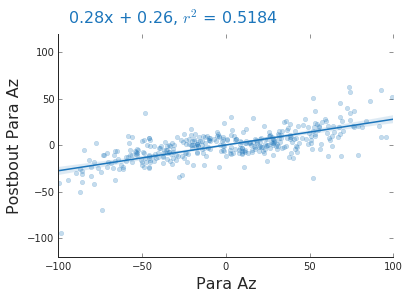

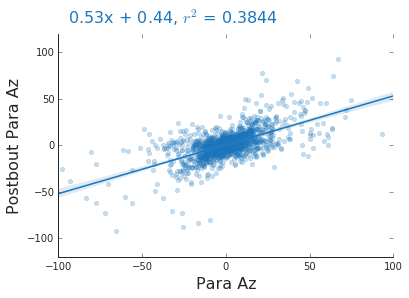

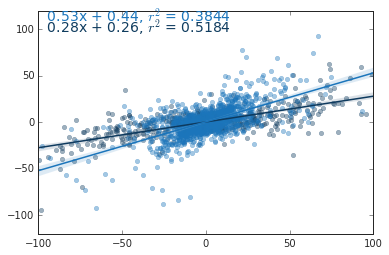

In [24]:
labels = ("Para Az", "Postbout Para Az")
query_exp = '"' + labels[0] + '","' + labels[1] + '"' 
az_blue = np.array([27/255.0, 117/255.0, 187/255.0])
color = az_blue
colors = [.5*color, color]
lims = [[-100, 100],[-120, 120]]

rp = bdsim_raw.two_variable_regression(
    query_exp, 
    '"Bout Number" == 0 AND "Strike Or Abort" < 3', color, labels, lims, 1)

rp2 = bdsim_raw.two_variable_regression(
    query_exp, 
    '"Bout Number" > 0 AND "Strike Or Abort" < 3', color, labels, lims, 1)

mrp = make_regression_plots(rp[1],rp[2], rp2[1], rp2[2], labels, colors, lims)
mrp.savefig('az_b0vsb1plus.pdf')
pl.show()

SELECT "Para Alt","Postbout Para Alt" FROM bout_table WHERE "Para Alt" > 0 AND "Bout Number" == 0 AND "Strike Or Abort" < 3
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  354
Model:                            GLM   Df Residuals:                      352
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                   107.579000231
Method:                          IRLS   Log-Likelihood:                -1329.3
Date:                Sun, 23 Jun 2019   Deviance:                       37868.
Time:                        02:05:48   Pearson chi2:                 3.79e+04
No. Iterations:                     4                                         
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const  

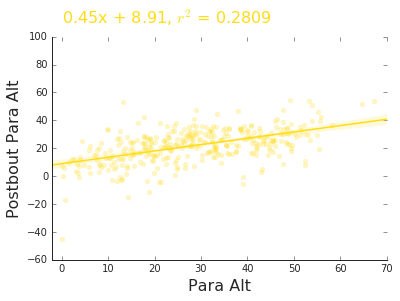

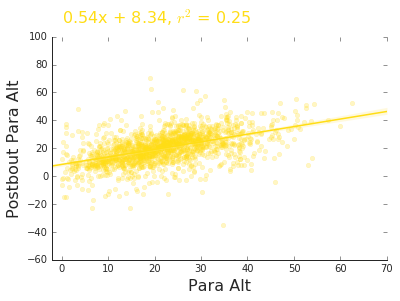

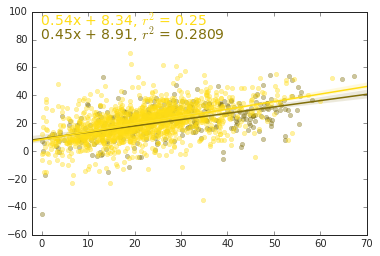

In [26]:
labels = ("Para Alt", "Postbout Para Alt")
query_exp = '"' + labels[0] + '","' + labels[1] + '"' 
alt_yellow = np.array([255/255.0, 221/255.0, 21/255.0])
color = alt_yellow
#colors = [np.array([200/255.0, 200/255.0, 200/255.0]), color]
colors = [.5*color, color]
#lims = [[np.nan, np.nan], [np.nan, np.nan]]

lims = [[-2, 70],[-60, 100]]

rp = bdsim_raw.two_variable_regression(
    query_exp, 
    '"Para Alt" > 0 AND "Bout Number" == 0 AND "Strike Or Abort" < 3', color, labels, lims, 1)

rp2 = bdsim_raw.two_variable_regression(
    query_exp, 
    '"Para Alt" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', color, labels, lims, 1)

mrp = make_regression_plots(rp[1],rp[2], rp2[1], rp2[2], labels, colors, lims)
mrp.savefig('alt_b0vsb1plus.pdf')
pl.show()

SELECT "Para Dist","Postbout Para Dist" FROM bout_table WHERE "Bout Number" == 0 AND "Strike Or Abort" < 3
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  384
Model:                            GLM   Df Residuals:                      382
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                   875.117053596
Method:                          IRLS   Log-Likelihood:                -1844.5
Date:                Sun, 23 Jun 2019   Deviance:                   3.3429e+05
Time:                        02:18:58   Pearson chi2:                 3.34e+05
No. Iterations:                     4                                         
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        -23.9244   

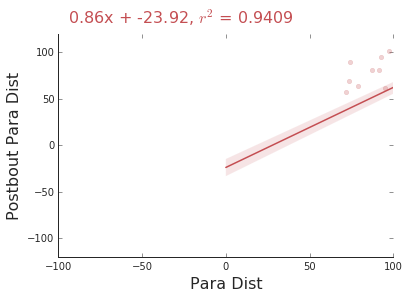

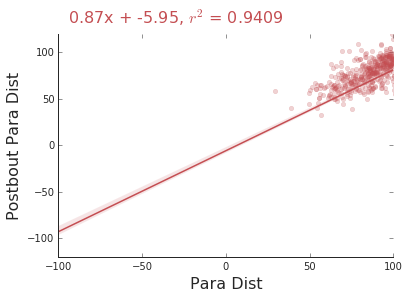

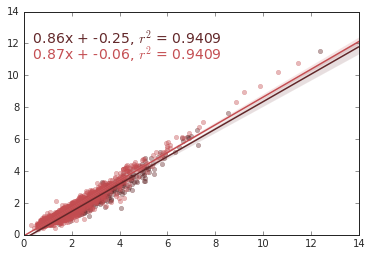

In [31]:
labels = ("Para Dist", "Postbout Para Dist")
query_exp = '"' + labels[0] + '","' + labels[1] + '"' 
color = np.array(cp[3])
#dist_red = np.array([190/255.0, 30/255.0, 45/255.0])
#color = dist_red
colors = [.5*color, color]
#lims = [[np.nan, np.nan], [np.nan, np.nan]]
lims = [[-100, 100],[-120, 120]]

rp = bdsim_raw.two_variable_regression(
    query_exp, 
    '"Bout Number" == 0 AND "Strike Or Abort" < 3', color, labels, lims)

rp2 = bdsim_raw.two_variable_regression(
    query_exp, 
    '"Bout Number" > 0 AND "Strike Or Abort" < 3', color, labels, lims)

mrp = make_regression_plots(rp[1],rp[2], rp2[1], rp2[2], labels, colors, lims)
mrp.savefig('dist_b0vsb1plus.pdf')
pl.show()

SELECT "Para Az","Postbout Para Az" FROM bout_table WHERE "Bout Number" > 6 AND "Strike Or Abort" < 3
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  228
Model:                            GLM   Df Residuals:                      226
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                   204.353967626
Method:                          IRLS   Log-Likelihood:                -928.98
Date:                Wed, 06 Nov 2019   Deviance:                       46184.
Time:                        21:37:32   Pearson chi2:                 4.62e+04
No. Iterations:                     4                                         
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -0.0700      0.

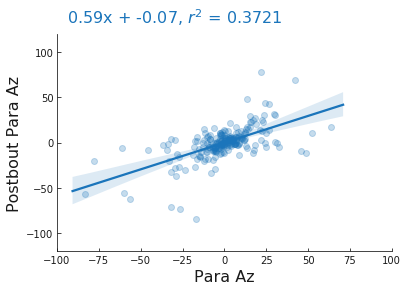

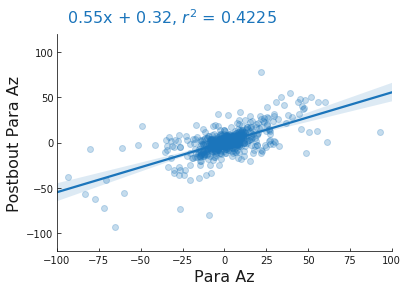

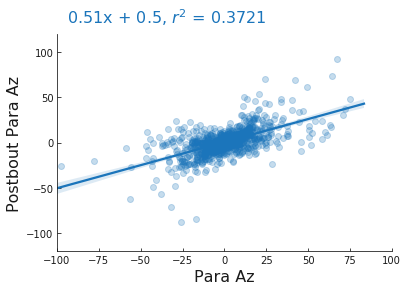

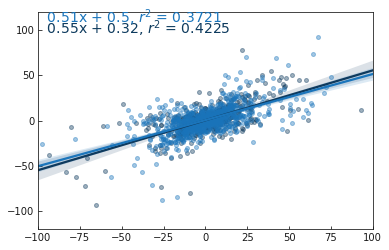

In [4]:
labels = ("Para Az", "Postbout Para Az")
query_exp = '"' + labels[0] + '","' + labels[1] + '"' 
az_blue = np.array([27/255.0, 117/255.0, 187/255.0])
color = az_blue
#colors = [.5*np.array(cp[0]), 1.2*np.array(cp[0])]
colors = [.5*color, color]
#lims = [[np.nan, np.nan], [np.nan, np.nan]]
lims = [[-100, 100],[-120, 120]]
rp = bdsim_raw.two_variable_regression(
    query_exp, 
    '"Bout Number" > 6 AND "Strike Or Abort" < 3', color, labels, lims, 1)
rp[0].savefig('prepost_az.pdf')
rp = bdsim_raw.two_variable_regression(
    query_exp, 
    '"Bout Number" > 0 AND (("Para Az Velocity" < 0 AND "Para Az" > 0) OR ("Para Az Velocity" > 0 AND "Para Az" < 0)) AND "Strike Or Abort" < 3', color, labels, lims, 1)
rp2 = bdsim_raw.two_variable_regression(
    query_exp, 
    '"Bout Number" > 0 AND (("Para Az Velocity" > 0 AND "Para Az" > 0) OR ("Para Az Velocity" < 0 AND "Para Az" < 0)) AND "Strike Or Abort" < 3', color, labels, lims, 1)
mrp = make_regression_plots(rp[1],rp[2], rp2[1], rp2[2], labels, colors, lims)
mrp.savefig('az_velocity.pdf')
pl.show()

SELECT "Para Alt","Postbout Para Alt" FROM bout_table WHERE "Bout Number" > 6 AND "Para Alt" > 0 AND "Strike Or Abort" < 3
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  208
Model:                            GLM   Df Residuals:                      206
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                   125.560259782
Method:                          IRLS   Log-Likelihood:                -796.74
Date:                Sun, 23 Jun 2019   Deviance:                       25865.
Time:                        01:56:53   Pearson chi2:                 2.59e+04
No. Iterations:                     4                                         
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const   

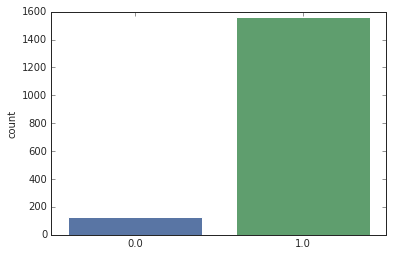

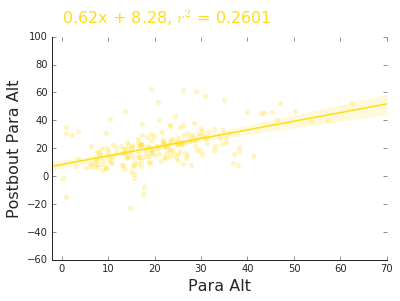

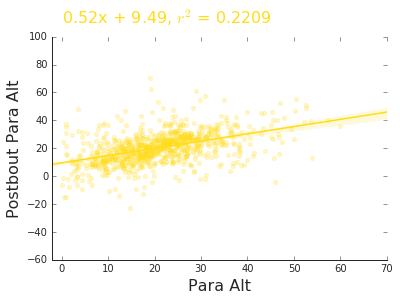

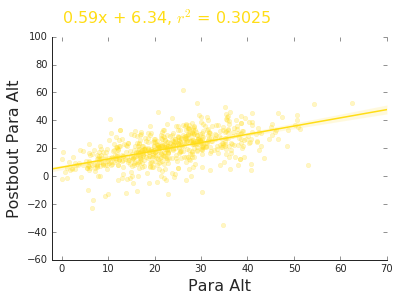

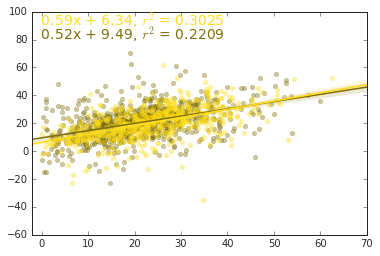

In [21]:
labels = ("Para Alt", "Postbout Para Alt")
query_exp = '"' + labels[0] + '","' + labels[1] + '"' 
alt_yellow = np.array([255/255.0, 221/255.0, 21/255.0])
color = alt_yellow
#colors = [np.array([200/255.0, 200/255.0, 200/255.0]), color]
colors = [.5*color, color]
#lims = [[np.nan, np.nan], [np.nan, np.nan]]

lims = [[-2, 70],[-60, 100]]
#lims = [[-70, 70],[-60, 100]]

#rp = bdsim_raw.two_variable_regression(query_exp, '"Para Az" BETWEEN 0 and .1')
#rp = bdsim_raw.two_variable_regression(query_exp, '"Bout Number" > 0 AND "Rev Bout Number" < -5 AND "Strike Or Abort" == 3', color, labels)
#rp = bdsim_raw.two_variable_regression(query_exp, '')

# THIS IS EVERY SINGLE BOUT -- NOTE THERE ARE 1692 pursuit bouts in the data in strikes < 3, and only 130 are below the fish. 

sb.countplot(np.ones(1562).tolist() + np.zeros(130).tolist())
pl.savefig('posnegcounts.pdf')

# rp = bdsim_raw.two_variable_regression(
#     query_exp, 
#     '"Bout Number" > 0 AND "Strike Or Abort" < 3', color, labels, lims, 1)

rp = bdsim_raw.two_variable_regression(
    query_exp, 
    '"Bout Number" > 6 AND "Para Alt" > 0 AND "Strike Or Abort" < 3', color, labels, lims, 1)

rp[0].savefig('prepost_alt.pdf')


rp = bdsim_raw.two_variable_regression(
    query_exp, 
    '"Para Alt" > 0 AND "Bout Number" > 0 AND "Para Alt Velocity" < 0 AND "Strike Or Abort" < 3', color, labels, lims, 1)
rp2 = bdsim_raw.two_variable_regression(
    query_exp, 
    '"Para Alt" > 0 AND "Bout Number" > 0 AND "Para Alt Velocity" > 0 AND "Strike Or Abort" < 3', color, labels, lims, 1)
# rp = bdsim_raw.two_variable_regression(
#     query_exp, 
#     '"Para Alt" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', color, labels, lims, 1)
# rp2 = bdsim_raw.two_variable_regression(
#     query_exp, 
#     '"Para Alt" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', color, labels, lims, 1)

mrp = make_regression_plots(rp[1],rp[2], rp2[1], rp2[2], labels, colors, lims)
mrp.savefig('alt_velocity.pdf')
pl.show()

SELECT "Para Dist","Postbout Para Dist" FROM bout_table WHERE "Bout Number" > 0 AND "Strike Or Abort" < 3
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 1692
Model:                            GLM   Df Residuals:                     1690
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                   555.272665646
Method:                          IRLS   Log-Likelihood:                -7746.1
Date:                Thu, 07 Nov 2019   Deviance:                   9.3841e+05
Time:                        22:01:35   Pearson chi2:                 9.38e+05
No. Iterations:                     4                                         
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -5.9489    

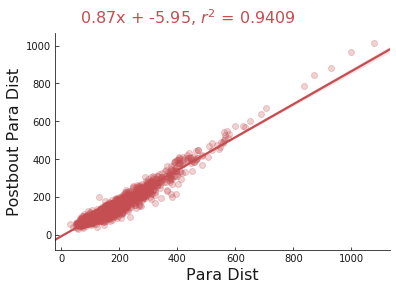

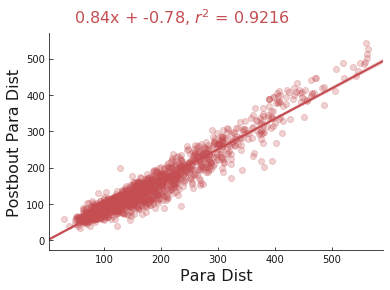

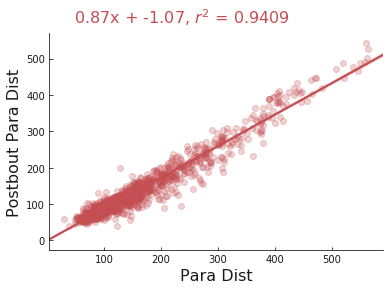

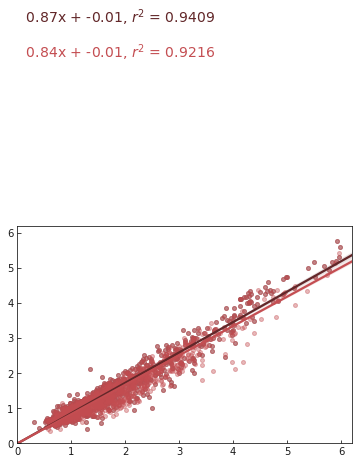

In [10]:
labels = ("Para Dist", "Postbout Para Dist")
query_exp = '"' + labels[0] + '","' + labels[1] + '"' 
color = np.array(cp[3])
#dist_red = np.array([190/255.0, 30/255.0, 45/255.0])
#color = dist_red
colors = [.5*color, color]
lims = [[np.nan, np.nan], [np.nan, np.nan]]
#lims = [[-100, 100],[-120, 120]]

rp = bdsim_raw.two_variable_regression(
    query_exp, 
    '"Bout Number" > 0 AND "Strike Or Abort" < 3', color, labels, lims)
rp[0].savefig('prepost_dist.pdf')

rp2 = bdsim_raw.two_variable_regression(
    query_exp, 
    '"Bout Number" > 0 AND "Para Dist"  < 566 AND "Strike Or Abort" < 3', color, labels, lims)
rp = bdsim_raw.two_variable_regression(
    query_exp, 
    '"Bout Number" > 0 AND "Para Dist" < 566 AND "Para Dist Velocity" > 0 AND "Strike Or Abort" < 3', color, labels, lims)
# rp2 = bdsim_raw.two_variable_regression(
#     query_exp, 
#     '"Bout Number" > 0 AND "Para Dist" < 566 AND "Para Dist Velocity" > 0 AND "Strike Or Abort" < 3', color, labels, lims)
mrp = make_regression_plots(rp[1],rp[2], rp2[1], rp2[2], labels, colors, lims)
mrp.savefig('dist_velocity.pdf')
pl.show()

### ABORT VS STRIKE COMPARISON TWO V HIST

SELECT "Para Az","Postbout Para Az" FROM bout_table WHERE "Bout Number" > 0 AND "Rev Bout Number" >= -4 AND "Strike Or Abort" == 3
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 1134
Model:                            GLM   Df Residuals:                     1132
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                   367.302435973
Method:                          IRLS   Log-Likelihood:                -4956.9
Date:                Thu, 27 Jun 2019   Deviance:                   4.1579e+05
Time:                        15:44:18   Pearson chi2:                 4.16e+05
No. Iterations:                     4                                         
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------


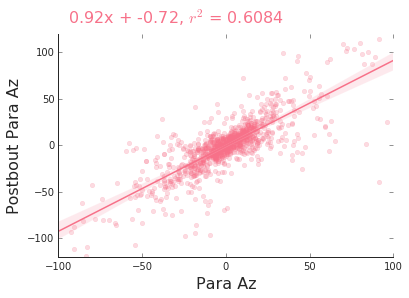

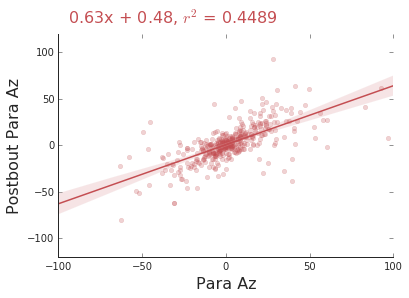

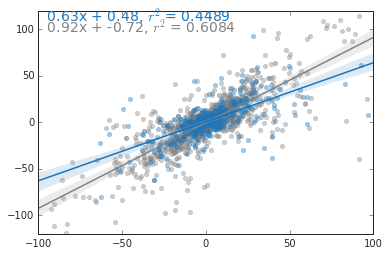

In [74]:
labels = ("Para Az", "Postbout Para Az")
query_exp = '"' + labels[0] + '","' + labels[1] + '"' 
az_blue = np.array([27/255.0, 117/255.0, 187/255.0])
color = np.array(cp[3])
#dist_red = np.array([190/255.0, 30/255.0, 45/255.0])


colors = [[130.0 / 255, 130.0 / 255, 130.0 / 255], az_blue]
#lims = [[np.nan, np.nan], [np.nan, np.nan]]
lims = [[-100, 100],[-120, 120]]
# rp = bdsim_raw.two_variable_regression(
#     query_exp, 
#     '"Bout Number" > 0 AND "Rev Bout Number" < -4 AND "Strike Or Abort" < 3', color, labels, lims)

rp = bdsim_raw.two_variable_regression(
    query_exp, 
    '"Bout Number" > 0 AND "Rev Bout Number" >= -4 AND "Strike Or Abort" == 3', husl[0], labels, lims, 1)

rp2 = bdsim_raw.two_variable_regression(
    query_exp, 
    '"Bout Number" > 0 AND "Rev Bout Number" < -4 AND "Strike Or Abort" == 3', color, labels, lims, 1)



mrp = make_regression_plots(rp[1],rp[2], rp2[1], rp2[2], labels, colors, lims)
mrp.savefig('abort_az_marr.pdf')
pl.show()

SELECT "Para Alt","Postbout Para Alt" FROM bout_table WHERE "Para Alt" > 0 AND "Bout Number" > 0 AND "Rev Bout Number" >= -4 AND "Strike Or Abort" == 3
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  920
Model:                            GLM   Df Residuals:                      918
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                   131.459489195
Method:                          IRLS   Log-Likelihood:                -3548.6
Date:                Thu, 27 Jun 2019   Deviance:                   1.2068e+05
Time:                        12:41:10   Pearson chi2:                 1.21e+05
No. Iterations:                     4                                         
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------

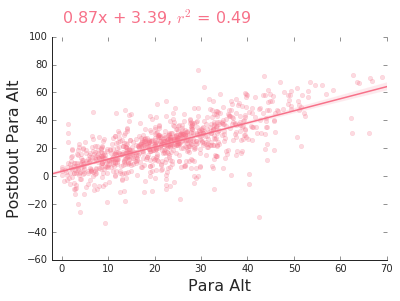

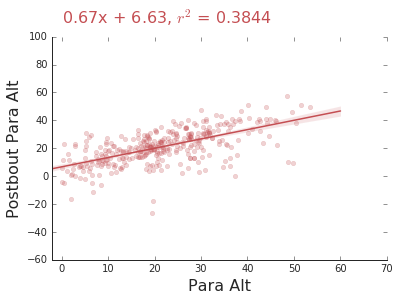

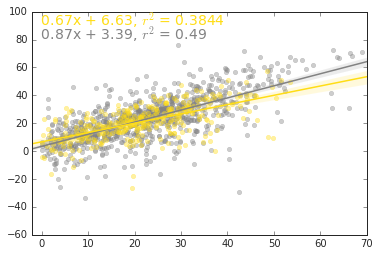

In [44]:
labels = ("Para Alt", "Postbout Para Alt")
query_exp = '"' + labels[0] + '","' + labels[1] + '"' 
az_blue = np.array([27/255.0, 117/255.0, 187/255.0])
alt_yellow = np.array([255/255.0, 221/255.0, 21/255.0])
color = np.array(cp[3])
#dist_red = np.array([190/255.0, 30/255.0, 45/255.0])


colors = [[130.0 / 255, 130.0 / 255, 130.0 / 255], alt_yellow]
#lims = [[np.nan, np.nan], [np.nan, np.nan]]
#lims = [[-100, 100],[-120, 120]]
lims = [[-2, 70], [-60, 100]]
# rp = bdsim_raw.two_variable_regression(
#     query_exp, 
#     '"Bout Number" > 0 AND "Rev Bout Number" < -4 AND "Strike Or Abort" < 3', color, labels, lims)

rp = bdsim_raw.two_variable_regression(
    query_exp, 
    '"Para Alt" > 0 AND "Bout Number" > 0 AND "Rev Bout Number" >= -4 AND "Strike Or Abort" == 3', husl[0], labels, lims, 1)

rp2 = bdsim_raw.two_variable_regression(
    query_exp, 
    '"Para Alt" > 0 AND "Bout Number" > 0 AND "Rev Bout Number" < -4 AND "Strike Or Abort" == 3', color, labels, lims, 1)
mrp = make_regression_plots(rp[1],rp[2], rp2[1], rp2[2], labels, colors, lims)
mrp.savefig('abort_alt_marr.pdf')
pl.show()

SELECT "Para Az","Bout Delta Yaw" FROM bout_table WHERE "Bout Number" > 0 AND "Rev Bout Number" < -4 AND "Strike Or Abort" == 3
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  429
Model:                            GLM   Df Residuals:                      427
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                   73.2288812535
Method:                          IRLS   Log-Likelihood:                -1528.7
Date:                Thu, 27 Jun 2019   Deviance:                       31269.
Time:                        17:12:05   Pearson chi2:                 3.13e+04
No. Iterations:                     4                                         
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
con

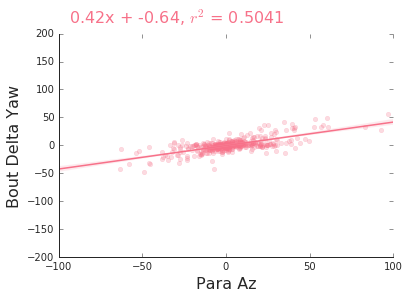

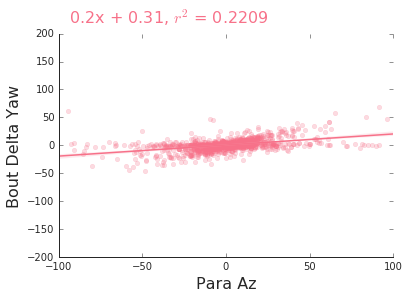

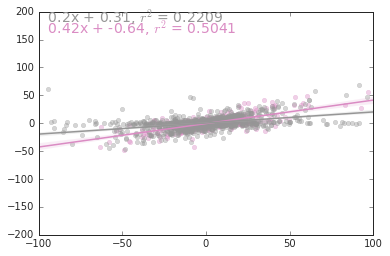

In [102]:
labels = ("Para Az", "Bout Delta Yaw")
query_exp = '"' + labels[0] + '","' + labels[1] + '"' 
az_blue = np.array([27/255.0, 117/255.0, 187/255.0])
color = husl[0]
#dist_red = np.array([190/255.0, 30/255.0, 45/255.0])
colors = [cp[6], [150.0 / 255, 150.0 / 255, 150.0 / 255]]
#lims = [[np.nan, np.nan], [np.nan, np.nan]]
lims = [[-100, 100],[-200, 200]]
# rp = bdsim_raw.two_variable_regression(
#     query_exp, 
#     '"Bout Number" > 0 AND "Rev Bout Number" < -4 AND "Strike Or Abort" < 3', color, labels, lims)

rp = bdsim_raw.two_variable_regression(
    query_exp, 
    '"Bout Number" > 0 AND "Rev Bout Number" < -4 AND "Strike Or Abort" == 3', husl[0], labels, lims, 1)

rp2 = bdsim_raw.two_variable_regression(
    query_exp, 
    '"Bout Number" > 0 AND "Rev Bout Number" >= -4 AND "Strike Or Abort" == 3', color, labels, lims, 1)
mrp = make_regression_plots(rp[1],rp[2], rp2[1], rp2[2], labels, colors, lims)
mrp.savefig('bout_dyaw_aborts.pdf')
pl.show()

SELECT "Para Alt","Bout Alt" FROM bout_table WHERE "Para Alt" > 0 AND "Bout Number" > 0 AND "Rev Bout Number" < -4 AND "Strike Or Abort" == 3
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  351
Model:                            GLM   Df Residuals:                      349
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                    588.52000641
Method:                          IRLS   Log-Likelihood:                -1616.3
Date:                Thu, 27 Jun 2019   Deviance:                   2.0539e+05
Time:                        16:51:43   Pearson chi2:                 2.05e+05
No. Iterations:                     4                                         
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------

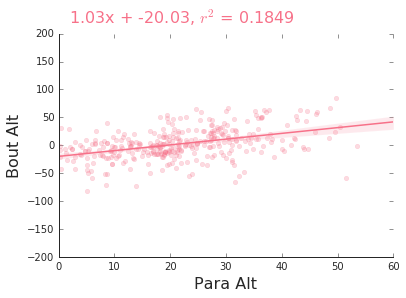

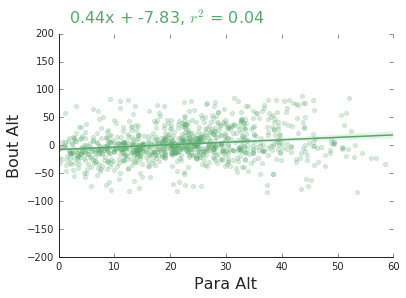

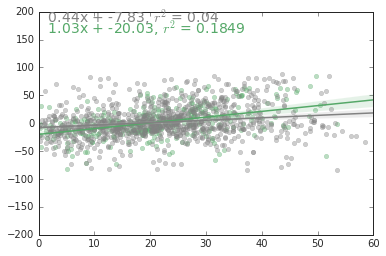

In [101]:
labels = ("Para Alt", "Bout Alt")
query_exp = '"' + labels[0] + '","' + labels[1] + '"' 
az_blue = np.array([27/255.0, 117/255.0, 187/255.0])

color = np.array(cp[2])
#dist_red = np.array([190/255.0, 30/255.0, 45/255.0])
colors = [cp[2], [130.0 / 255, 130.0 / 255, 130.0 / 255]]
#lims = [[np.nan, np.nan], [np.nan, np.nan]]
#lims = [[-100, 100],[-120, 120]]
lims = [[0, 60], [-200, 200]]
rp = bdsim_raw.two_variable_regression(
    query_exp, 
    '"Para Alt" > 0 AND "Bout Number" > 0 AND "Rev Bout Number" < -4 AND "Strike Or Abort" == 3', husl[0], labels, lims, 1)

rp2 = bdsim_raw.two_variable_regression(
    query_exp, 
    '"Para Alt" > 0 AND "Bout Number" > 0 AND "Rev Bout Number" >= -4 AND "Strike Or Abort" == 3', color, labels, lims, 1)
mrp = make_regression_plots(rp[1],rp[2], rp2[1], rp2[2], labels, colors, lims)
mrp.savefig('bout_alt_aborts.pdf')
pl.show()

SELECT "Para Dist" FROM bout_table WHERE "Bout Number" > 0 AND "Strike Or Abort" < 3
1784 total bouts
174.366299696
107.638111744
1.84828277678
1.14096398449


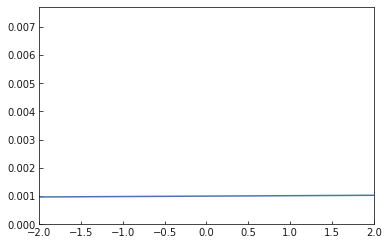

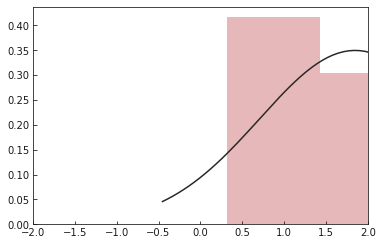

In [13]:
p1, d1 = bdsim_raw.single_hist('"Para Dist"', '"Bout Number" > 0 AND "Strike Or Abort" < 3', cp[0])
d1_mm = d1 * .0106
print np.mean(np.abs(d1_mm))
print np.std(np.abs(d1_mm))
pl.show()

fig = pl.figure()
dp = sb.distplot(d1_mm, kde=False, fit=norm, bins=10, color=cp[3])
dp.set_xlim([-2, 2])
pl.show()
#fig.savefig('strikezone_dist.pdf')

### SINGLE VARIABLE HISTOGRAMS FOR STRIKE POSITION

SELECT "Para Dist" FROM bout_table WHERE "Bout Number" < 0 AND "Strike Or Abort" == 1
162 total bouts
82.3945289928
16.7477325163
0.873382007324
0.177525964673


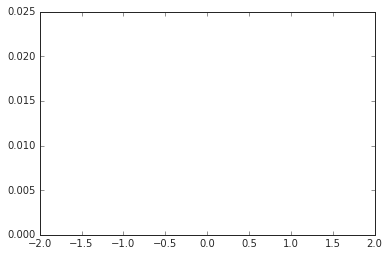

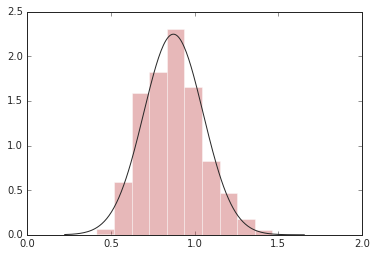

In [29]:
p1, d1 = bdsim_raw.single_hist('"Para Dist"', '"Bout Number" < 0 AND "Strike Or Abort" == 1', cp[0])
d1_mm = d1 * .0106
print np.mean(d1_mm)
print np.std(d1_mm)
pl.show()

fig = pl.figure()
dp = sb.distplot(d1_mm, kde=False, fit=norm, bins=10, color=cp[3])
dp.set_xlim([0, 2])
pl.show()
fig.savefig('strikezone_dist.pdf')

SELECT "Para Alt" FROM bout_table WHERE "Bout Number" < 0 AND "Strike Or Abort" == 1
162 total bouts
0.304015725617
0.196157060575
SELECT "Para Az" FROM bout_table WHERE "Bout Number" < 0 AND "Strike Or Abort" == 1
162 total bouts
0.0150917117469
0.125858952619
Alt Means
17.4188179835
11.2389716926
Az Means
0.864691388726
7.211186799


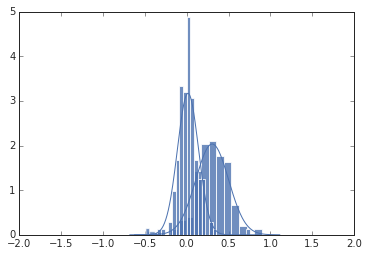

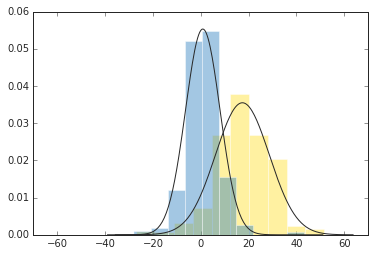

In [28]:
p1, d1 = bdsim_raw.single_hist('"Para Alt"', '"Bout Number" < 0 AND "Strike Or Abort" == 1', cp[0])
p2, d2 = bdsim_raw.single_hist('"Para Az"', '"Bout Number" < 0 AND "Strike Or Abort" == 1', cp[0])
d1_deg = np.degrees(d1)
d2_deg = np.degrees(d2)
az_blue = np.array([27/255.0, 117/255.0, 187/255.0])
alt_yellow = np.array([255/255.0, 221/255.0, 21/255.0])
print('Alt Means')
print np.mean(d1_deg)
print np.std(d1_deg)
print('Az Means')
print np.mean(d2_deg)
print np.std(d2_deg)
pl.show()

fig = pl.figure()
dp = sb.distplot(d1_deg, kde=False, fit=norm, bins=10, color=alt_yellow.tolist())
dp = sb.distplot(d2_deg, kde=False, fit=norm, bins=10, color=az_blue.tolist())
dp.set_xlim([-70, 70])
pl.show()
fig.savefig('strikezone.pdf')

### SINGLE VARIABLE HISTOGRAMS FOR DISTRIBUTION OF POSTBOUT PARA POSITION

SELECT "Postbout Para Alt" FROM bout_table WHERE "Bout Number" > 0 AND "Para Alt" > .874 AND "Para Alt" < .874 + .087 AND "Strike Or Abort" < 3
14 total bouts
0.676037182857
0.231315959289
SELECT "Postbout Para Alt" FROM bout_table WHERE "Bout Number" > 0 AND "Para Alt" > .699 AND "Para Alt" < .699 + .087 AND "Strike Or Abort" < 3
34 total bouts
0.488473200294
0.170763999423
SELECT "Postbout Para Alt" FROM bout_table WHERE "Bout Number" > 0 AND "Para Alt" > .524 AND "Para Alt" < .524 + .087 AND "Strike Or Abort" < 3
133 total bouts
0.440030518406
0.183187701576
SELECT "Postbout Para Alt" FROM bout_table WHERE "Bout Number" > 0 AND "Para Alt" > .349 AND "Para Alt" < .349 + .087 AND "Strike Or Abort" < 3
290 total bouts
0.375212271855
0.152881064585
SELECT "Postbout Para Alt" FROM bout_table WHERE "Bout Number" > 0 AND "Para Alt" > .175 AND "Para Alt" < .175 + .087 AND "Strike Or Abort" < 3
198 total bouts
0.263371006429
0.165010619637
SELECT "Postbout Para Alt" FROM bout_table WHERE "Bo

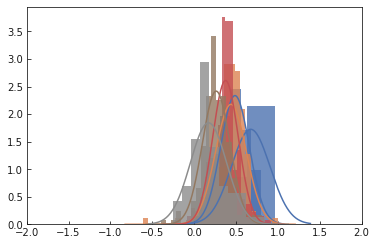

13.2534282013
9.78405645971
10.495882159
8.75943976818
9.45441208007
12.4091769654


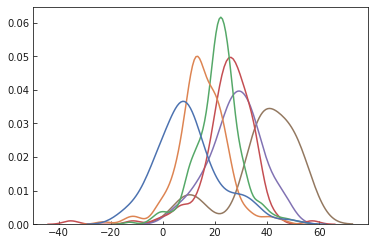

In [47]:
# p0, d0 = bdsim_raw.single_hist('"Postbout Para Alt"', '"Bout Number" > 0 AND "Para Alt" > .611 AND "Para Alt" < .611 + .087 AND "Strike Or Abort" < 3', cp[0])
# p1, d1 = bdsim_raw.single_hist('"Postbout Para Alt"', '"Bout Number" > 0 AND "Para Alt" > .524 AND "Para Alt" < .524 + .087 AND "Strike Or Abort" < 3', cp[1])
# p2, d2 = bdsim_raw.single_hist('"Postbout Para Alt"', '"Bout Number" > 0 AND "Para Alt" > .436 AND "Para Alt" < .436 + .087 AND "Strike Or Abort" < 3', cp[2])
# p3, d3 = bdsim_raw.single_hist('"Postbout Para Alt"', '"Bout Number" > 0 AND "Para Alt" > .349 AND "Para Alt" < .349 + .087 AND "Strike Or Abort" < 3', cp[3])
# p4, d4 = bdsim_raw.single_hist('"Postbout Para Alt"', '"Bout Number" > 0 AND "Para Alt" > .262 AND "Para Alt" < .262 + .087 AND "Strike Or Abort" < 3', cp[4])
# p5, d5 = bdsim_raw.single_hist('"Postbout Para Alt"', '"Bout Number" > 0 AND "Para Alt" > .175 AND "Para Alt" < .175 + .087 AND "Strike Or Abort" < 3', cp[5])
# p6, d6 = bdsim_raw.single_hist('"Postbout Para Alt"', '"Bout Number" > 0 AND "Para Alt" > .087 AND "Para Alt" < .087 + .087 AND "Strike Or Abort" < 3', cp[6])
# p7, d7 = bdsim_raw.single_hist('"Postbout Para Alt"', '"Bout Number" > 0 AND "Para Alt" > 0 AND "Para Alt" < .087 AND "Strike Or Abort" < 3', cp[7])
# pl.show()

p2, d2 = bdsim_raw.single_hist('"Postbout Para Alt"', '"Bout Number" > 0 AND "Para Alt" > .874 AND "Para Alt" < .874 + .087 AND "Strike Or Abort" < 3', cp[0])
p3, d3 = bdsim_raw.single_hist('"Postbout Para Alt"', '"Bout Number" > 0 AND "Para Alt" > .699 AND "Para Alt" < .699 + .087 AND "Strike Or Abort" < 3', cp[0])
p4, d4 = bdsim_raw.single_hist('"Postbout Para Alt"', '"Bout Number" > 0 AND "Para Alt" > .524 AND "Para Alt" < .524 + .087 AND "Strike Or Abort" < 3', cp[1])
p5, d5 = bdsim_raw.single_hist('"Postbout Para Alt"', '"Bout Number" > 0 AND "Para Alt" > .349 AND "Para Alt" < .349 + .087 AND "Strike Or Abort" < 3', cp[3])
p6, d6 = bdsim_raw.single_hist('"Postbout Para Alt"', '"Bout Number" > 0 AND "Para Alt" > .175 AND "Para Alt" < .175 + .087 AND "Strike Or Abort" < 3', cp[5])
p7, d7 = bdsim_raw.single_hist('"Postbout Para Alt"', '"Bout Number" > 0 AND "Para Alt" > 0 AND "Para Alt" < .087 AND "Strike Or Abort" < 3', cp[7])
pl.show()
# print np.mean(np.degrees(d0))
# print np.mean(np.degrees(d1))
# print np.mean(np.degrees(d2))
# print np.mean(np.degrees(d3))
# print np.mean(np.degrees(d4))
# print np.mean(np.degrees(d5))
# print np.mean(np.degrees(d6))
# print np.mean(np.degrees(d7))


#print np.std(np.degrees(d0))
#print np.std(np.degrees(d1))
print np.std(np.degrees(d2))
print np.std(np.degrees(d3))
print np.std(np.degrees(d4))
print np.std(np.degrees(d5))
print np.std(np.degrees(d6))
print np.std(np.degrees(d7))


#sb.kdeplot(np.degrees(d0), color=cp[7])
#sb.kdeplot(np.degrees(d1), color=cp[6])
sb.kdeplot(np.degrees(d2), color=cp[5])
sb.kdeplot(np.degrees(d3), color=cp[4])
sb.kdeplot(np.degrees(d4), color=cp[3])
sb.kdeplot(np.degrees(d5), color=cp[2])
sb.kdeplot(np.degrees(d6), color=cp[1])
sb.kdeplot(np.degrees(d7), color=cp[0])
pl.savefig('kdeplot.pdf')


SELECT "Postbout Para Dist" FROM bout_table WHERE "Bout Number" > 0 AND "Para Dist" BETWEEN 384 AND 480  AND "Strike Or Abort" < 3
60 total bouts
374.802705787
42.9230906804
SELECT "Postbout Para Dist" FROM bout_table WHERE "Bout Number" > 0 AND "Para Dist" BETWEEN 336 AND 384  AND "Strike Or Abort" < 3
46 total bouts
297.599110383
37.8301750865
SELECT "Postbout Para Dist" FROM bout_table WHERE "Bout Number" > 0 AND "Para Dist" BETWEEN 288 AND 336  AND "Strike Or Abort" < 3
82 total bouts
257.968712165
30.6152508657
SELECT "Postbout Para Dist" FROM bout_table WHERE "Bout Number" > 0 AND "Para Dist" BETWEEN 240 AND 288  AND "Strike Or Abort" < 3
132 total bouts
214.502433116
27.9750299935
SELECT "Postbout Para Dist" FROM bout_table WHERE "Bout Number" > 0 AND "Para Dist" BETWEEN 192 AND 240  AND "Strike Or Abort" < 3
205 total bouts
169.579362728
29.2820116639
SELECT "Postbout Para Dist" FROM bout_table WHERE "Bout Number" > 0 AND "Para Dist" BETWEEN 144 AND 192  AND "Strike Or Abort" <

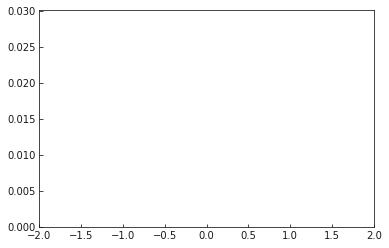

SELECT "Postbout Para Dist" FROM bout_table WHERE "Bout Number" > 0 AND "Para Dist" BETWEEN 456 AND 480  AND "Strike Or Abort" < 3
9 total bouts
413.097938711
24.1923236787
SELECT "Postbout Para Dist" FROM bout_table WHERE "Bout Number" > 0 AND "Para Dist" BETWEEN 360 AND 384  AND "Strike Or Abort" < 3
28 total bouts
303.238810761
40.3719292015
SELECT "Postbout Para Dist" FROM bout_table WHERE "Bout Number" > 0 AND "Para Dist" BETWEEN 264 AND 288  AND "Strike Or Abort" < 3
70 total bouts
221.179130536
26.0607855462
SELECT "Postbout Para Dist" FROM bout_table WHERE "Bout Number" > 0 AND "Para Dist" BETWEEN 168 AND 192  AND "Strike Or Abort" < 3
134 total bouts
140.016377032
24.3325584462
SELECT "Postbout Para Dist" FROM bout_table WHERE "Bout Number" > 0 AND "Para Dist" BETWEEN 144 AND 168  AND "Strike Or Abort" < 3
180 total bouts
124.710082799
21.8256900813
SELECT "Postbout Para Dist" FROM bout_table WHERE "Bout Number" > 0 AND "Para Dist" BETWEEN 120 AND 144   AND "Strike Or Abort" <

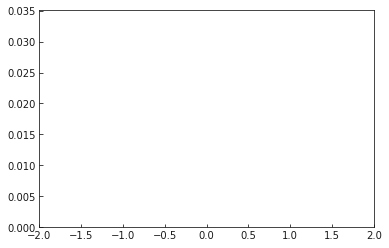

4.37883815034
3.21433139406
2.34449878368
1.48417359654
1.32192687767
1.13624255485
0.982879966807
0.827664991519
0.27624432679
0.25792511953
0.231352314861
0.19410008415
0.131581348135
0.136774322838


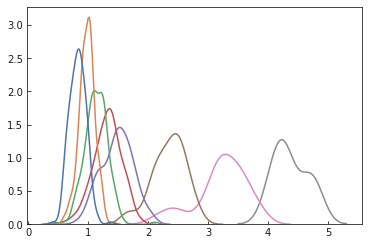

In [53]:
p0, d0 = bdsim_raw.single_hist('"Postbout Para Dist"', '"Bout Number" > 0 AND "Para Dist" BETWEEN 384 AND 480  AND "Strike Or Abort" < 3', cp[0])
p1, d1 = bdsim_raw.single_hist('"Postbout Para Dist"', '"Bout Number" > 0 AND "Para Dist" BETWEEN 336 AND 384  AND "Strike Or Abort" < 3', cp[1])
p2, d2 = bdsim_raw.single_hist('"Postbout Para Dist"', '"Bout Number" > 0 AND "Para Dist" BETWEEN 288 AND 336  AND "Strike Or Abort" < 3', cp[2])
p3, d3 = bdsim_raw.single_hist('"Postbout Para Dist"', '"Bout Number" > 0 AND "Para Dist" BETWEEN 240 AND 288  AND "Strike Or Abort" < 3', cp[3])
p4, d4 = bdsim_raw.single_hist('"Postbout Para Dist"', '"Bout Number" > 0 AND "Para Dist" BETWEEN 192 AND 240  AND "Strike Or Abort" < 3', cp[4])
p5, d5 = bdsim_raw.single_hist('"Postbout Para Dist"', '"Bout Number" > 0 AND "Para Dist" BETWEEN 144 AND 192  AND "Strike Or Abort" < 3', cp[5])
p6, d6 = bdsim_raw.single_hist('"Postbout Para Dist"', '"Bout Number" > 0 AND "Para Dist" BETWEEN 96 AND 144   AND "Strike Or Abort" < 3', cp[6])
p7, d7 = bdsim_raw.single_hist('"Postbout Para Dist"', '"Bout Number" > 0 AND "Para Dist" BETWEEN 0 AND 96  AND "Strike Or Abort" < 3', cp[7])
pl.show()


p0, d0 = bdsim_raw.single_hist('"Postbout Para Dist"', '"Bout Number" > 0 AND "Para Dist" BETWEEN 456 AND 480  AND "Strike Or Abort" < 3', cp[0])
p1, d1 = bdsim_raw.single_hist('"Postbout Para Dist"', '"Bout Number" > 0 AND "Para Dist" BETWEEN 360 AND 384  AND "Strike Or Abort" < 3', cp[1])
p2, d2 = bdsim_raw.single_hist('"Postbout Para Dist"', '"Bout Number" > 0 AND "Para Dist" BETWEEN 264 AND 288  AND "Strike Or Abort" < 3', cp[1])
p3, d3 = bdsim_raw.single_hist('"Postbout Para Dist"', '"Bout Number" > 0 AND "Para Dist" BETWEEN 168 AND 192  AND "Strike Or Abort" < 3', cp[2])
p4, d4 = bdsim_raw.single_hist('"Postbout Para Dist"', '"Bout Number" > 0 AND "Para Dist" BETWEEN 144 AND 168  AND "Strike Or Abort" < 3', cp[4])
p5, d5 = bdsim_raw.single_hist('"Postbout Para Dist"', '"Bout Number" > 0 AND "Para Dist" BETWEEN 120 AND 144   AND "Strike Or Abort" < 3', cp[6])
p6, d6 = bdsim_raw.single_hist('"Postbout Para Dist"', '"Bout Number" > 0 AND "Para Dist" BETWEEN 96 AND 120   AND "Strike Or Abort" < 3', cp[6])
p7, d7 = bdsim_raw.single_hist('"Postbout Para Dist"', '"Bout Number" > 0 AND "Para Dist" BETWEEN 72 AND 96  AND "Strike Or Abort" < 3', cp[7])
pl.show()

print np.mean(np.array(d0) * .0106)
print np.mean(np.array(d1) * .0106)
print np.mean(np.array(d2) * .0106)
print np.mean(np.array(d3) * .0106)
print np.mean(np.array(d4) * .0106)
print np.mean(np.array(d5) * .0106)
print np.mean(np.array(d6) * .0106)
print np.mean(np.array(d7) * .0106)

#print np.std(np.array(d0) * .0106)
#print np.std(np.array(d1) * .0106)
print np.std(np.array(d2) * .0106)
print np.std(np.array(d3) * .0106)
print np.std(np.array(d4) * .0106)
print np.std(np.array(d5) * .0106)
print np.std(np.array(d6) * .0106)
print np.std(np.array(d7) * .0106)



sb.kdeplot(np.array(d0) * .0106, color=cp[7])
sb.kdeplot(np.array(d1) * .0106, color=cp[6])
sb.kdeplot(np.array(d2) * .0106, color=cp[5])
sb.kdeplot(np.array(d3) * .0106, color=cp[4])
sb.kdeplot(np.array(d4) * .0106, color=cp[3])
sb.kdeplot(np.array(d5) * .0106, color=cp[2])
sb.kdeplot(np.array(d6) * .0106, color=cp[1])
sb.kdeplot(np.array(d7) * .0106, color=cp[0])

pl.savefig('dist_kde.pdf')

0.349065850399
0.174532925199
0.0872664625997
SELECT "Para Az" FROM bout_table WHERE "Bout Number" > 0 AND "Para Az" > .349 + .087 AND "Para Az" < .349 + 2 * .087 AND "Strike Or Abort" < 3
74 total bouts
0.473149826338
0.0252122094699
SELECT "Para Az" FROM bout_table WHERE "Bout Number" > 0 AND "Para Az" > .349 AND "Para Az" < .349 + .087 AND "Strike Or Abort" < 3
78 total bouts
0.390273996077
0.0243934641491
SELECT "Para Az" FROM bout_table WHERE "Bout Number" > 0 AND "Para Az" > .262 AND "Para Az" < .262 + .087 AND "Strike Or Abort" < 3
150 total bouts
0.301695086007
0.0240096821654
SELECT "Para Az" FROM bout_table WHERE "Bout Number" > 0 AND "Para Az" > .175 AND "Para Az" < .175 + .087 AND "Strike Or Abort" < 3
254 total bouts
0.215372389705
0.0254757146801
SELECT "Para Az" FROM bout_table WHERE "Bout Number" > 0 AND "Para Az" > .087 AND "Para Az" < .087 + .087 AND "Strike Or Abort" < 3
428 total bouts
0.127226193708
0.0247110006903
SELECT "Para Az" FROM bout_table WHERE "Bout Numbe

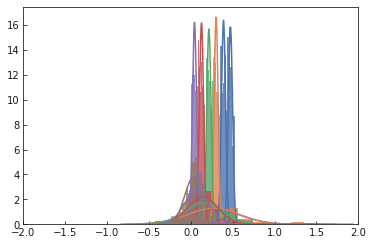

15.4462943347
8.99556678913
8.15163359143
3.96139916719
1.7831132481


(0, 1.5)

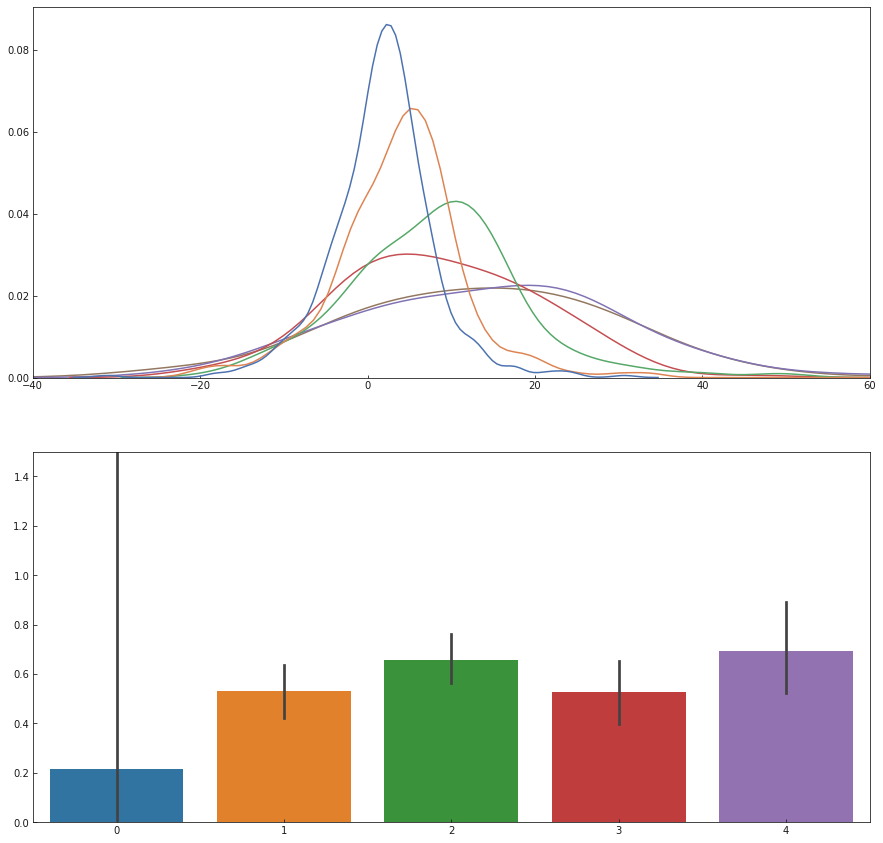

In [52]:
print np.radians(20)
print np.radians(10)
print np.radians(5)


# NOTE THERE ARE VERY FEW BOUTS OUTSIDE OF 25 DEGREES DURING PURSUITS. INNER THREE BINS HAVE 1300 bouts, outer two only 40 combined.
p0, d0 = bdsim.single_hist('"Para Az"', '"Bout Number" > 0 AND "Para Az" > .349 + .087 AND "Para Az" < .349 + 2 * .087 AND "Strike Or Abort" < 3', cp[0])
p1, d1 = bdsim.single_hist('"Para Az"', '"Bout Number" > 0 AND "Para Az" > .349 AND "Para Az" < .349 + .087 AND "Strike Or Abort" < 3', cp[0])
p2, d2 = bdsim.single_hist('"Para Az"', '"Bout Number" > 0 AND "Para Az" > .262 AND "Para Az" < .262 + .087 AND "Strike Or Abort" < 3', cp[1])
p3, d3 = bdsim.single_hist('"Para Az"', '"Bout Number" > 0 AND "Para Az" > .175 AND "Para Az" < .175 + .087 AND "Strike Or Abort" < 3', cp[2])
p4, d4 = bdsim.single_hist('"Para Az"', '"Bout Number" > 0 AND "Para Az" > .087 AND "Para Az" < .087 + .087 AND "Strike Or Abort" < 3', cp[3])
p5, d5 = bdsim.single_hist('"Para Az"', '"Bout Number" > 0 AND "Para Az" > 0 AND "Para Az" < .087 AND "Strike Or Abort" < 3', cp[4])

paz1 = np.mean(np.degrees(d1))
paz2 = np.mean(np.degrees(d2))
paz3 = np.mean(np.degrees(d3))
paz4 = np.mean(np.degrees(d4))
paz5 = np.mean(np.degrees(d5))

paz1 = np.degrees(d1)
paz2 = np.degrees(d2)
paz3 = np.degrees(d3)
paz4 = np.degrees(d4)
paz5 = np.degrees(d5)


p0, d0 = bdsim.single_hist('"Postbout Para Az"', '"Bout Number" > 0 AND "Para Az" > .349 + .087 AND "Para Az" < .349 + 2 * .087 AND "Strike Or Abort" < 3', cp[0])
p1, d1 = bdsim.single_hist('"Postbout Para Az"', '"Bout Number" > 0 AND "Para Az" > .349 AND "Para Az" < .349 + .087 AND "Strike Or Abort" < 3', cp[1])
p2, d2 = bdsim.single_hist('"Postbout Para Az"', '"Bout Number" > 0 AND "Para Az" > .262 AND "Para Az" < .262 + .087 AND "Strike Or Abort" < 3', cp[2])
p3, d3 = bdsim.single_hist('"Postbout Para Az"', '"Bout Number" > 0 AND "Para Az" > .175 AND "Para Az" < .175 + .087 AND "Strike Or Abort" < 3', cp[3])
p4, d4 = bdsim.single_hist('"Postbout Para Az"', '"Bout Number" > 0 AND "Para Az" > .087 AND "Para Az" < .087 + .087 AND "Strike Or Abort" < 3', cp[4])
p5, d5 = bdsim.single_hist('"Postbout Para Az"', '"Bout Number" > 0 AND "Para Az" > 0 AND "Para Az" < .087 AND "Strike Or Abort" < 3', cp[5])




pl.show()

#sb.kdeplot(np.degrees(d1), color=cp[0])

print np.mean(np.degrees(d1))
print np.mean(np.degrees(d2))
print np.mean(np.degrees(d3))
print np.mean(np.degrees(d4))
print np.mean(np.degrees(d5))

fig, ax = pl.subplots(2,1, figsize=(15,15))

sb.kdeplot(np.degrees(d0), color=cp[5], ax=ax[0])
sb.kdeplot(np.degrees(d1), color=cp[4], ax=ax[0])
sb.kdeplot(np.degrees(d2), color=cp[3], ax=ax[0])
sb.kdeplot(np.degrees(d3), color=cp[2], ax=ax[0])
sb.kdeplot(np.degrees(d4), color=cp[1], ax=ax[0])
sb.kdeplot(np.degrees(d5), color=cp[0], ax=ax[0])
ax[0].set_xlim([-40, 60])
pl.savefig('KDE_5degbins_prebpostaz.pdf')


sb.barplot(data=[np.degrees(d5) / paz5, np.degrees(d4) / paz4, 
                 np.degrees(d3) / paz3, np.degrees(d2) / paz2, 
                 np.degrees(d1) / paz1], ax=ax[1])

ax[1].set_ylim([0, 1.5])

# ARGUMENT!!!!!!
# IF FAR AWAY IN AZ, WANT TO BE NOISY. THIS IS TRUE (i.e. more noise, same mean -- also point out regression fit)
# IF VERY CLOSE, WANT TO BE PRECISE! THIS AGAIN IS TRUE. SHOW STD FOR .005 to .006, etc. THERE IS LESS NOISE, 
# MEANING THE FISH IS TRYING TO BE STATIC! 
# THE STATIC TRANSFORMATION DOES BETTER IF THE PARA STARTS IN THE LOW NOISE ZONE. IT DOES WORSE IF IT STARTS AWAY!


### SINGLE VARIABLE HISTOGRAMS

SELECT "Bout Number" FROM bout_table WHERE "Rev Bout Number" == -2  AND "Strike Or Abort" < 3
444 total bouts
4.12162162162
2.94905406747
SELECT "Bout Number" FROM bout_table WHERE "Rev Bout Number" == -2  AND "Strike Or Abort" == 3
522 total bouts
2.68199233716
2.81389911235
5.0
4.0
Counter({4.0: 94, 5.0: 92, 6.0: 66, 7.0: 48, 8.0: 33, 3.0: 28, 9.0: 18, 2.0: 17, 10.0: 11, 11.0: 10, 12.0: 8, 13.0: 6, 14.0: 4, 15.0: 4, 16.0: 2, 17.0: 1, 21.0: 1, 26.0: 1})
Counter({3.0: 122, 2.0: 98, 4.0: 89, 5.0: 73, 6.0: 49, 8.0: 28, 7.0: 15, 9.0: 15, 10.0: 11, 11.0: 7, 12.0: 6, 13.0: 6, 19.0: 2, 28.0: 1})
quartiles
6.12162162162
5.0
4.0
7.0


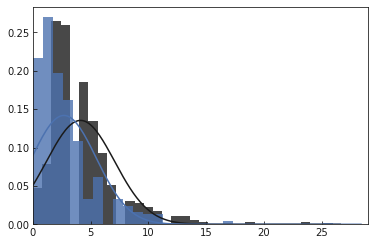

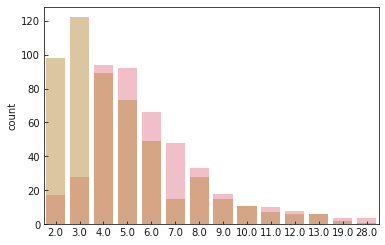

In [23]:
#p1, d1 = bdsim_raw.single_hist('"Para Alt"', '"Bout Number" <= -1  AND "Strike Or Abort" == 2', husl[0])
#p2, d2 = bdsim_raw.single_hist('"Bout Dist"', '"Bout Number" > 0  AND "Strike Or Abort" <= 2', husl[0], [50,[0,1000]])
#p3, d3 = bdsim_raw.single_hist('"Para Az"', '"Rev Bout Number" == -2  AND "Strike Or Abort" < 3', husl[0])
#p3, d3 = bdsim_raw.single_hist('"Para Az"', '"Rev Bout Number" == -2  AND "Strike Or Abort" == 3', husl[1])
#fit = beta.fit(d2, floc=0)

p1, d1 = bdsim_allnans.single_hist('"Bout Number"', '"Rev Bout Number" == -2  AND "Strike Or Abort" < 3', 'k', [30, [0,29], 0])
p2, d2 = bdsim_allnans.single_hist('"Bout Number"', '"Rev Bout Number" == -2  AND "Strike Or Abort" == 3', 'b', [30, [0,29], 0])
#fit = beta.fit(d2, floc=0)
#fit = exponnorm.fit(d2, floc=.3)
#print fit
#pl.plot(np.linspace(-2,2,100), [beta.pdf(x, fit[0], fit[1], scale=fit[3]) for x in np.linspace(-2,2,100)])
#pl.plot(np.linspace(-2,2,100), [exponnorm.pdf(x, fit[0], fit[1], scale=fit[2]) for x in np.linspace(-2,2,100)])
#normfit = norm.fit(d2)
#print normfit


pl.figure()

# Add 2 for the strike and the init. 
sb.countplot(d1 + 2, color=husl[0], alpha=0.5)
print np.median(d1+2)
sb.countplot(d2 + 2, color=husl[1], alpha=0.5)
print np.median(d2+2)
print Counter(d1 + 2)
print Counter(d2 + 2)

print('quartiles')
print np.mean(d1+2)
print np.percentile(d1+2, 50)
print np.percentile(d1+2, 25)
print np.percentile(d1+2, 75)


pl.show()

### USE FOR DESCRIBING PARA SPECIFIC FEATURES

0.158394285714
SELECT "Avg Para Velocity" FROM bout_table WHERE "Bout Number" = 0 AND "Strike Or Abort" <= 3
962 total bouts
3.41919081896
1.78765052075


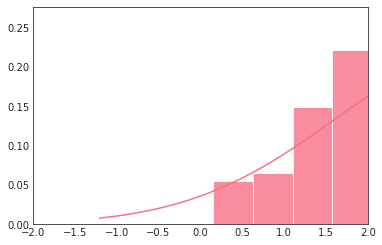

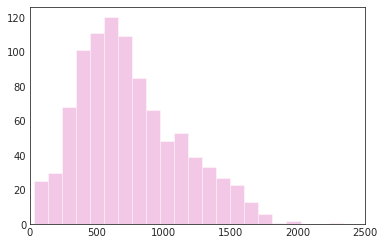

(755.07130585331788, 394.77282333252509)
(262,)
(709,)
(856,)
(962,)
682.520063429


In [7]:
# p1, d1 = bdsim_raw.single_hist('"Avg Para Velocity"', '"Strike Or Abort" < 3', husl[0], [200, [0,10]])
# pl.show()

# #d1 = np.abs(d1) 
# #d1 = np.degrees(np.abs(d1))
# print np.mean(d1)
# fig, ax = pl.subplots(1,1)
# sb.distplot(d1, kde=0, ax=ax, bins=100)
# ax.set_xlim([0,10])
# pl.show()


# measured 35 random para lengths in cont.AVI from 090518_2
avg_para_size = .0106 * np.array([11,15,17,14,11,15,14,15,14,15,17,14,16,18,18,17,13,18,11,13,16,13,18,19,15,16,15,17,12,16,16,13,12, 15,14])
print np.mean(avg_para_size)
cpal = sb.color_palette()

# Mean para size is 158 microns


p1, d1 = bdsim_raw.single_hist('"Avg Para Velocity"', '"Bout Number" = 0 AND "Strike Or Abort" <= 3', husl[0])
pl.show()

fig, ax = pl.subplots(1,1)
d1 = d1 * .0106 / .048 * 1000
sb.distplot(d1, kde=0, color=cpal[6], ax=ax)
ax.set_xlim([0,2500])
pl.show()
nf = norm.fit(d1)
print nf

print d1[d1 > 952].shape
print d1[d1 > 476].shape
print d1[d1 > 330].shape
print d1.shape


print np.median(d1)

fig.savefig('sing_hist.pdf')
#norm.cdf(400, nf[0], nf[1])

# Tank is 20 mm long, and covered by 1888 pixels. .0106 mm / pixel 

# Avg velocity is how many pixels the para moved in 3 frames (48 ms). 
# so you want to take your avg velocity in pixels / 3fr
# multiply by .0106 mm / pixel, mutiply by 1 3fr / .048 ms. 



In [50]:
print normfit
print norm.cdf(.5, .30, .19)

(0.30401572561728391, 0.19615706057480004)
0.853745060908


SELECT "Para Alt Velocity" FROM bout_table WHERE "Bout Number" = 0 AND "Strike Or Abort" <= 3
962 total bouts
0.000501424862786
0.30690354586


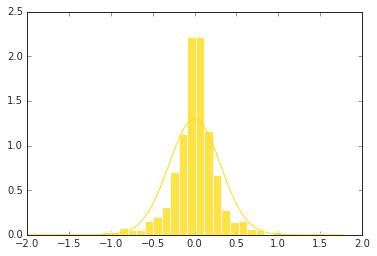

0.0287295283806
17.5842778954


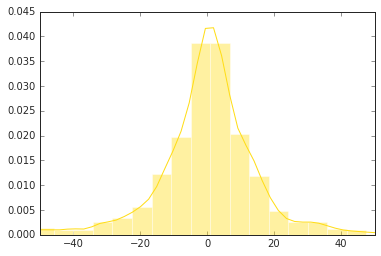

In [33]:
alt_yellow = [255/255.0, 221/255.0, 21/255.0]
p1, d1 = bdsim_raw.single_hist('"Para Alt Velocity"', '"Bout Number" = 0 AND "Strike Or Abort" <= 3', alt_yellow)
pl.show()
d1_deg = np.degrees(d1)
print np.mean(d1_deg)
print np.std(d1_deg)

fig, ax = pl.subplots(1,1)
sb.distplot(d1_deg, ax=ax, color=alt_yellow)
ax.set_xlim([-50, 50])
fig.savefig('stimvelocity_alt.pdf')

SELECT "Para Az Velocity" FROM bout_table WHERE "Bout Number" = 0 AND "Strike Or Abort" <= 3
962 total bouts
0.0147662429938
0.376349215939


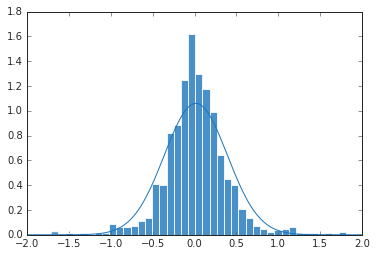

0.846043402807
21.5632216964


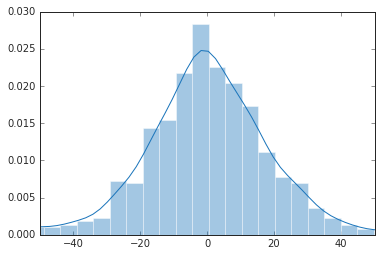

In [34]:
az_blue = [27/255.0, 117/255.0, 187/255.0]
p1, d1 = bdsim_raw.single_hist('"Para Az Velocity"', '"Bout Number" = 0 AND "Strike Or Abort" <= 3', az_blue)
pl.show()
d1_deg = np.degrees(d1)
print np.mean(d1_deg)
print np.std(d1_deg)

fig, ax = pl.subplots(1,1)
sb.distplot(d1_deg, ax=ax, color=az_blue)
ax.set_xlim([-50, 50])
fig.savefig('stimvelocity_az.pdf')

SELECT "Para Dist Velocity" FROM bout_table WHERE "Bout Number" = 0 AND "Strike Or Abort" <= 3
962 total bouts
-0.654817247028
66.3258900451


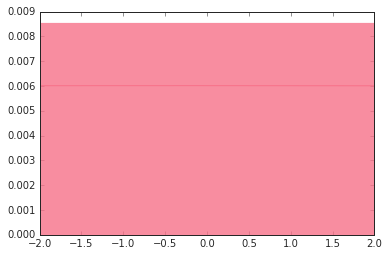

-0.0069410628185
0.703054434478


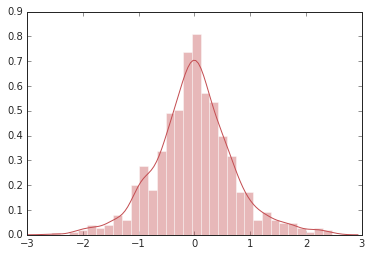

In [35]:
p1, d1 = bdsim_raw.single_hist('"Para Dist Velocity"', '"Bout Number" = 0 AND "Strike Or Abort" <= 3', husl[0])
pl.show()
d1_mm = .0106 * d1
print np.mean(d1_mm)
print np.std(d1_mm)
fig, ax = pl.subplots(1,1)
sb.distplot(d1_mm, ax=ax, color=cp[3])
ax.set_xlim([-3, 3])
fig.savefig('stimvelocity_dist.pdf')

SELECT "Para Dist" FROM bout_table WHERE "Bout Number" > 0 AND "Strike Or Abort" < 3
1784 total bouts
174.366299696
107.638111744


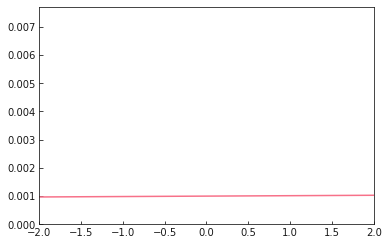

1.84828277678
1.14096398449


(-3, 3)

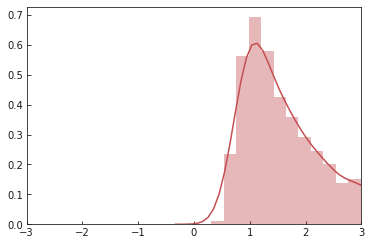

In [8]:
p1, d1 = bdsim_raw.single_hist('"Para Dist"', '"Bout Number" > 0 AND "Strike Or Abort" < 3', husl[0])
pl.show()
d1_mm = .0106 * d1
print np.mean(d1_mm)
print np.std(d1_mm)
fig, ax = pl.subplots(1,1)
sb.distplot(d1_mm, ax=ax, color=cp[3])
ax.set_xlim([-3, 3])


SELECT "Para Az Velocity" FROM bout_table WHERE "Bout Number" > 0 AND "Strike Or Abort" < 3
1784 total bouts
-0.0139769318178
0.777434743776


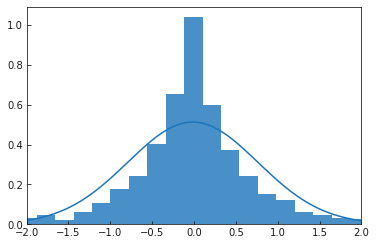

29.2913523884
33.5678691481
SELECT "Para Alt Velocity" FROM bout_table WHERE "Bout Number" > 0 AND "Strike Or Abort" < 3
1784 total bouts
-0.17775452216
0.659050468238


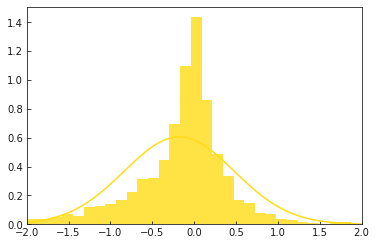

24.6965887955
30.3262765107


(-50, 50)

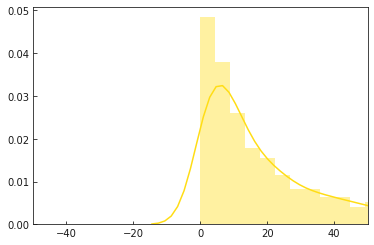

In [12]:
az_blue = [27/255.0, 117/255.0, 187/255.0]
p1, d1 = bdsim_raw.single_hist('"Para Az Velocity"', '"Bout Number" > 0 AND "Strike Or Abort" < 3', az_blue)
pl.show()
d1_deg = np.abs(np.degrees(d1))
print np.mean(d1_deg)
print np.std(d1_deg)

alt_yellow = [255/255.0, 221/255.0, 21/255.0]
p1, d1 = bdsim_raw.single_hist('"Para Alt Velocity"', '"Bout Number" > 0 AND "Strike Or Abort" < 3', alt_yellow)
pl.show()
d1_deg = np.abs(np.degrees(d1))
print np.mean(d1_deg)
print np.std(d1_deg)

fig, ax = pl.subplots(1,1)
sb.distplot(d1_deg, ax=ax, color=alt_yellow)
ax.set_xlim([-50, 50])


### PREDICTION CALCULATORS

In [116]:
# ALWAYS USE INVERTED DATA HERE!
spacing = .3
p_angle_bounds = [[i, i+spacing] for i in np.arange(0,1,spacing)]
norm_az = 0
norm_alt = 0
p_angle_bounds_invert = [[-a[1], -a[0]] for a in p_angle_bounds]
print p_angle_bounds_invert
vels = [-5, -.01]
vels = [.01, 5]
use_abs_val = 0
distance_limit = [0, 1000]
#p_angle_bounds = [[0, 1]]
#distance_limit = [0, 200]
actions = [1,2]
#skip_bout_numbers = ['reverse', range(-50, -3) + [-1]]
#skip_bout_numbers = ['forward', range(1, 50) + [-1]]
skip_bout_numbers = ['forward', [-1,0]]

[[-0.29999999999999999, -0.0], [-0.59999999999999998, -0.29999999999999999], [-0.89999999999999991, -0.59999999999999998], [-1.2, -0.89999999999999991]]


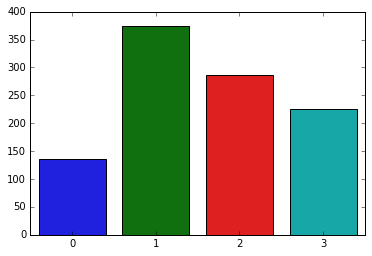

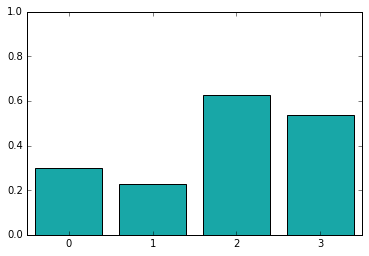

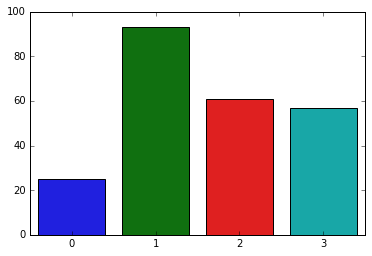

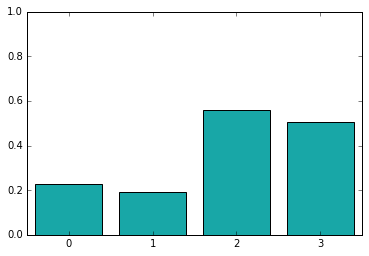

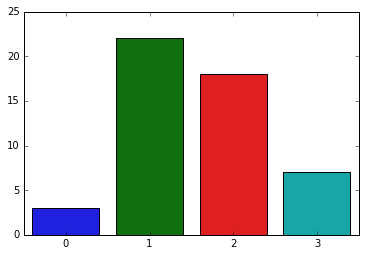

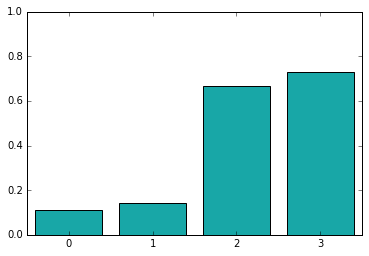

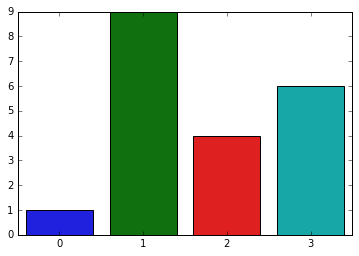

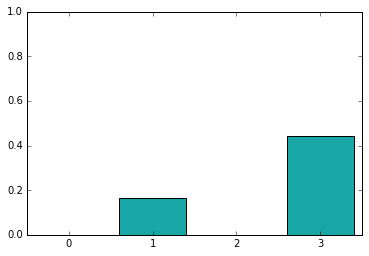

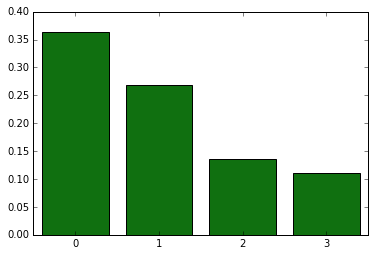

TOTAL BOUTS
[511, 118, 25, 10]


In [117]:
tb, bout_assignment = pred_wrapper(data, p_angle_bounds, 
                                   skip_bout_numbers, actions, distance_limit, use_abs_val, vels, 
                                   norm_az, norm_alt, 'az')

IndexError: list index out of range

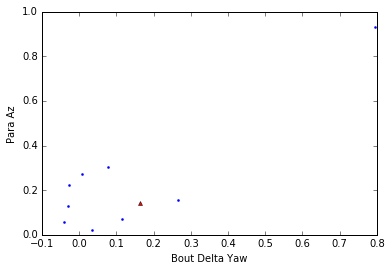

In [118]:
varb = "Bout Delta Yaw"
varb_predict_overshoot = []
varb_predict_undershoot = []

p_angle_bounds = p_angle_bounds[0]
plot_varb1 = "Bout Delta Yaw"
plot_varb2 = "Para Az"

# a bout assignment of 1 is an undershooting lag.
# bout assignment of 2 is an overshooting lag
# bout assignment of 3 is an undershooting lead.
# bout assignment of 4 is an overshooting lead

# dots are lags, triangles are leads
# blue is undershoot, red is overshoot

for ind, p_az in enumerate(data["Para Az"]):
        marker_size = 4
        if bout_assignment[ind] == 0:
            continue
        if bout_assignment[ind] == 1:
            marker_type = '.'
            p_color = 'b'
        if bout_assignment[ind] == 2:
            marker_type = '.'
            p_color = 'r'
        if bout_assignment[ind] == 3:
            marker_type = '^'
            p_color = 'b'
            varb_predict_undershoot.append(data[varb][ind])
        if bout_assignment[ind] == 4:
            marker_type = '^'
            p_color = 'r'
            varb_predict_overshoot.append(data[varb][ind])
        pl.plot(data[plot_varb1][ind], data[plot_varb2][ind], color=p_color,
            marker=marker_type, ms=marker_size, linestyle='None')
        pl.xlabel(plot_varb1)
        pl.ylabel(plot_varb2)
pl.savefig('circle_triangle_plot.pdf')
pl.figure()
sb.distplot(varb_predict_overshoot, fit_kws={"color":"blue"}, fit=norm, kde=False,color='b')
sb.distplot(varb_predict_undershoot, fit_kws={"color":"yellow"}, fit=norm, kde=False,color='y')


pl.savefig('prediction_tally.pdf')

# RED CIRCLES ARE A FAIL TO LEAD WHEN PARA IS GOING RIGHT
# BLUE CIRCLES ARE A FAIL TO LEAD WHEN PARA IS GOING LEFT
# RED SQUARES ARE A SUCCESSFUL LEAD WHEN PARA IS GOING RIGHT
# BLUE TRIANGLES ARE SUCCESSFUL LEADS WHEN PARA IS GOING LEFT
# RED CIRCLES ACCOUNT FOR NOT SEEING A CHANGE IN BOUT AZ AND YAW IN THIS WINDOW! 

In [ ]:
pred_velocities = []
for loc, i in enumerate(bout_assignment):
    if i != 0:
        pred_velocities.append(data["Para Az Velocity"][loc])
pl.hist(3*np.degrees(pred_velocities), bins=20)

        
        

#         print('Pred Bout Assignment: ' + str(bout_assignment[loc]))
#         a = raw_input('')

In [ ]:
print np.degrees(np.mean(np.abs(data["Para Az Velocity"])))
#print np.degrees(np.mean(np.abs(nac_data["Para Az Velocity"])))

(6698,)
(6698,)


[-3,
 -2,
 -1,
 -5,
 -4,
 -3,
 -2,
 -1,
 -4,
 -3,
 -2,
 -1,
 1.0,
 1.0,
 -5,
 -4,
 -3,
 -2,
 -1,
 1.0,
 1.0,
 1.0,
 -2,
 -1,
 -3,
 -2,
 -1,
 -5,
 -4,
 -3,
 -2,
 -1,
 -5,
 -4,
 -3,
 -2,
 -1,
 -2,
 -1,
 -4,
 -3,
 -2,
 -1,
 1.0,
 1.0,
 1.0,
 -4,
 -3,
 -2,
 -1,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 -4,
 -3,
 -2,
 -1,
 -3,
 -2,
 -1,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 -3,
 -2,
 -1,
 1.0,
 1.0,
 1.0,
 1.0,
 -19,
 -18,
 -17,
 -16,
 -15,
 -14,
 -13,
 -12,
 -11,
 -10,
 -9,
 -8,
 -7,
 -6,
 -5,
 -4,
 -3,
 -2,
 -1,
 -5,
 -4,
 -3,
 -2,
 -1,
 -2,
 -1,
 -2,
 -1,
 -8,
 -7,
 -6,
 -5,
 -4,
 -3,
 -2,
 -1,
 1.0,
 1.0,
 -5,
 -4,
 -3,
 -2,
 -1,
 -4,
 -3,
 -2,
 -1,
 1.0,
 1.0,
 1.0,
 -8,
 -7,
 -6,
 -5,
 -4,
 -3,
 -2,
 -1,
 1.0,
 1.0,
 1.0,
 1.0,
 -2,
 -1,
 -2,
 -1,
 -2,
 -1,
 -9,
 -8,
 -7,
 -6,
 -5,
 -4,
 -3,
 -2,
 -1,
 -4,
 -3,
 -2,
 -1,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 -4,
 -3,
 -2,
 -1,
 -4,
 -3,
 -2,
 -1,
 -9,
 -8,
 -7,
 -6,
 -5,
 -4,
 -3,
 -2,
 -1,
 1.0,
 1.0,
 1.0,
 1.0,
 -2,
 -1,